### Airline Passenger Satisfaction Machine Learning Project

#### Problem Statement

Following the pandemic, the airline industry suffered a massive setback, with ICAO estimating a 371 billion dollar loss in 2020, and a 329 billion dollar loss with reduced seat capacity. As a result, in order to revitalise the industry in the face of the current recession, it is absolutely necessary to understand the customer pain points and improve their satisfaction with the services provided.

This data set contains a survey on air passenger satisfaction survey.Need to predict Airline passenger satisfaction level:1.Satisfaction 2.Neutral or dissatisfied.

Select the best predictive models for predicting passengers satisfaction

#### Key Observations

- This is a binary classification problem,it is necessary to predict which of the two levels of satisfaction with the airline the passenger belongs to:Satisfaction, Neutral or dissatisfied

- Before diving into the data, thinking intuitively and being an avid traveller myself, from my experience, the main factors should be:

- Delays in the flight

- Staff efficiency to address customer needs

- Services provided in the flight

#### Data Dictionary

- 1.Gender: male or female
- 2.Customer type: regular or non-regular airline customer
- 3.Age: the actual age of the passenger
- 4.Type of travel: the purpose of the passenger's flight (personal or business travel)
- 5.Class: business, economy, economy plus
- 6.Flight distance
- 7.Inflight wifi service: satisfaction level with Wi-Fi service on board (0: not rated; 1-5)
- 8.Departure/Arrival time convenient: departure/arrival time satisfaction level (0: not rated; 1-5)
- 9.Ease of Online booking: online booking satisfaction rate (0: not rated; 1-5)
- 10.Gate location: level of satisfaction with the gate location (0: not rated; 1-5)
- 11.Food and drink: food and drink satisfaction level (0: not rated; 1-5)
- 12.Online boarding: satisfaction level with online boarding (0: not rated; 1-5)
- 13.Seat comfort: seat satisfaction level (0: not rated; 1-5)
- 14.Inflight entertainment: satisfaction with inflight entertainment (0: not rated; 1-5)
- 15.On-board service: level of satisfaction with on-board service (0: not rated; 1-5)
- 16.Leg room service: level of satisfaction with leg room service (0: not rated; 1-5)
- 17.Baggage handling: level of satisfaction with baggage handling (0: not rated; 1-5)
- 18.Checkin service: level of satisfaction with checkin service (0: not rated; 1-5)
- 19.Inflight service: level of satisfaction with inflight service (0: not rated; 1-5)
- 20.Cleanliness: level of satisfaction with cleanliness (0: not rated; 1-5)
- 21.Departure delay in minutes:
- 22.Arrival delay in minutes:
- 23.Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction).

#### Importing Libraries

In [408]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams

from warnings import filterwarnings
filterwarnings('ignore')

import statsmodels.api as sm
import statsmodels.stats.api as sms
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from imblearn.over_sampling import SMOTE

#### Loading the Train Dataset

In [176]:
train_data = pd.read_csv(r'C:\Data Science\Resume_Projects\train.csv', index_col = False)

In [177]:
df = train_data.copy()

In [178]:
pd.options.display.max_columns = None

#### Checking first five rows of the dataset

In [179]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


#### Checking last five rows of the dataset

In [180]:
df.tail()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,3,3,1,1,1,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


#### Dropping columns 'Unnamed: 0' and 'id' as it is of no use in further analysis

In [181]:
df.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

#### Checking shape of the dataset

In [182]:
rows = ['Number of rows', 'Number of columns']
pd.DataFrame(df.shape, columns = ['shape of dataset'], index=rows)

,shape of dataset
Number of rows,103904
Number of columns,23


#### Checking datatypes of Attributes in a dataset

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

#### Checking Descriptive Statistics of the dataset

In [184]:
round(df.describe(), 2)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103594.00
mean,39.38,1189.45,2.73,3.06,2.76,2.98,3.20,3.25,3.44,3.36,3.38,3.35,3.63,3.30,3.64,3.29,14.82,15.18
std,15.11,997.15,1.33,1.53,1.40,1.28,1.33,1.35,1.32,1.33,1.29,1.32,1.18,1.27,1.18,1.31,38.23,38.70
min,7.00,31.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,27.00,414.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,3.00,3.00,2.00,0.00,0.00
50%,40.00,843.00,3.00,3.00,3.00,3.00,3.00,3.00,4.00,4.00,4.00,4.00,4.00,3.00,4.00,3.00,0.00,0.00
75%,51.00,1743.00,4.00,4.00,4.00,4.00,4.00,4.00,5.00,4.00,4.00,4.00,5.00,4.00,5.00,4.00,12.00,13.00
max,85.00,4983.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1592.00,1584.00


#### For Categorical variables

In [185]:
df.describe(include = [object])

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


#### Checking for Missing values in a dataset

In [186]:
missing_values = pd.DataFrame({'missing_values': df.isnull().sum()[df.isnull().sum()>0],
                              '% of missing_values': df.isnull().sum()[df.isnull().sum()>0]/df.shape[0]})

In [187]:
missing_values

,missing_values,% of missing_values
Arrival Delay in Minutes,310,0.002984


In [188]:
# !pip install missingno

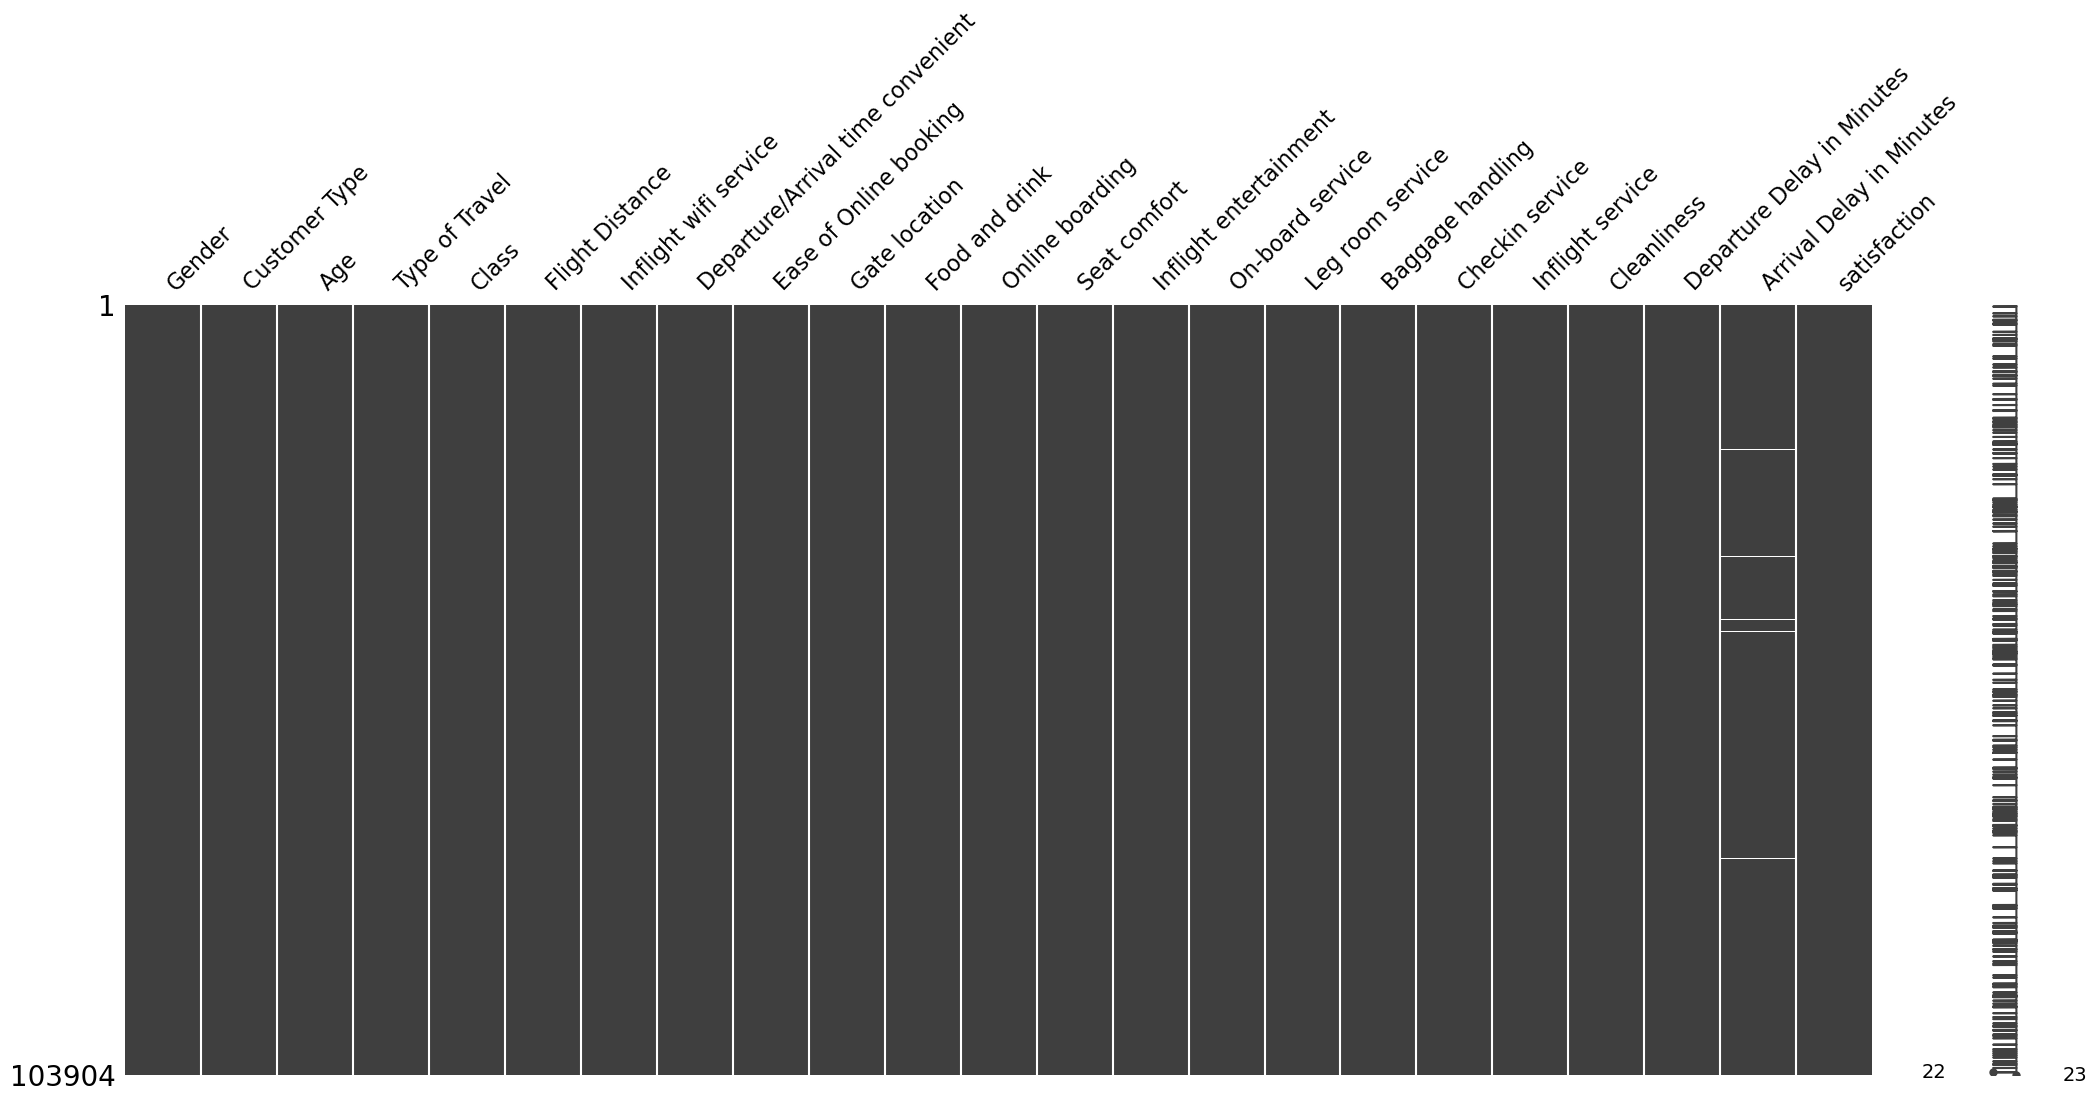

In [189]:
import missingno as msno
msno.matrix(df);

#### Observations
- There are 103904 rows for 23 features in our data
- We see in the training data, that all the datatypes belongs to a numeric class that is int, float and object
- Only arrival delay in minutes have some null values
- The number of null values is 310 in "Arrival Delay in Minutes" column
- The percentage of null values is ~ 0.3%

#### Treating Missing values

In [191]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median())

In [192]:
df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

- Now their are no Missing values in a dataset

#### Checking for Duplicate values in a dataset

In [193]:
dup = df.duplicated()
print('Number of duplicate values:', dup.sum())
df[dup]

Number of duplicate values: 0


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction


#### Checking Percentage of values for Class of interest in Target variable 'Satisfaction'

In [194]:
df['satisfaction'].value_counts()[1]/len(df['satisfaction'])

0.43333269171542965

- This problem is a binary classification problem of classes 0 or 1 denoting customer satisfaction, The class 1 has 43.33% of total values. Hence, this is a balanced learning problem. hence will not be requiring any resampling techniques to tackle this

In [195]:
df_num = df.select_dtypes(['int', 'float'])
df_cat = df.select_dtypes('object')

### Data Visualization - EDA

### Data Distribution Graphs

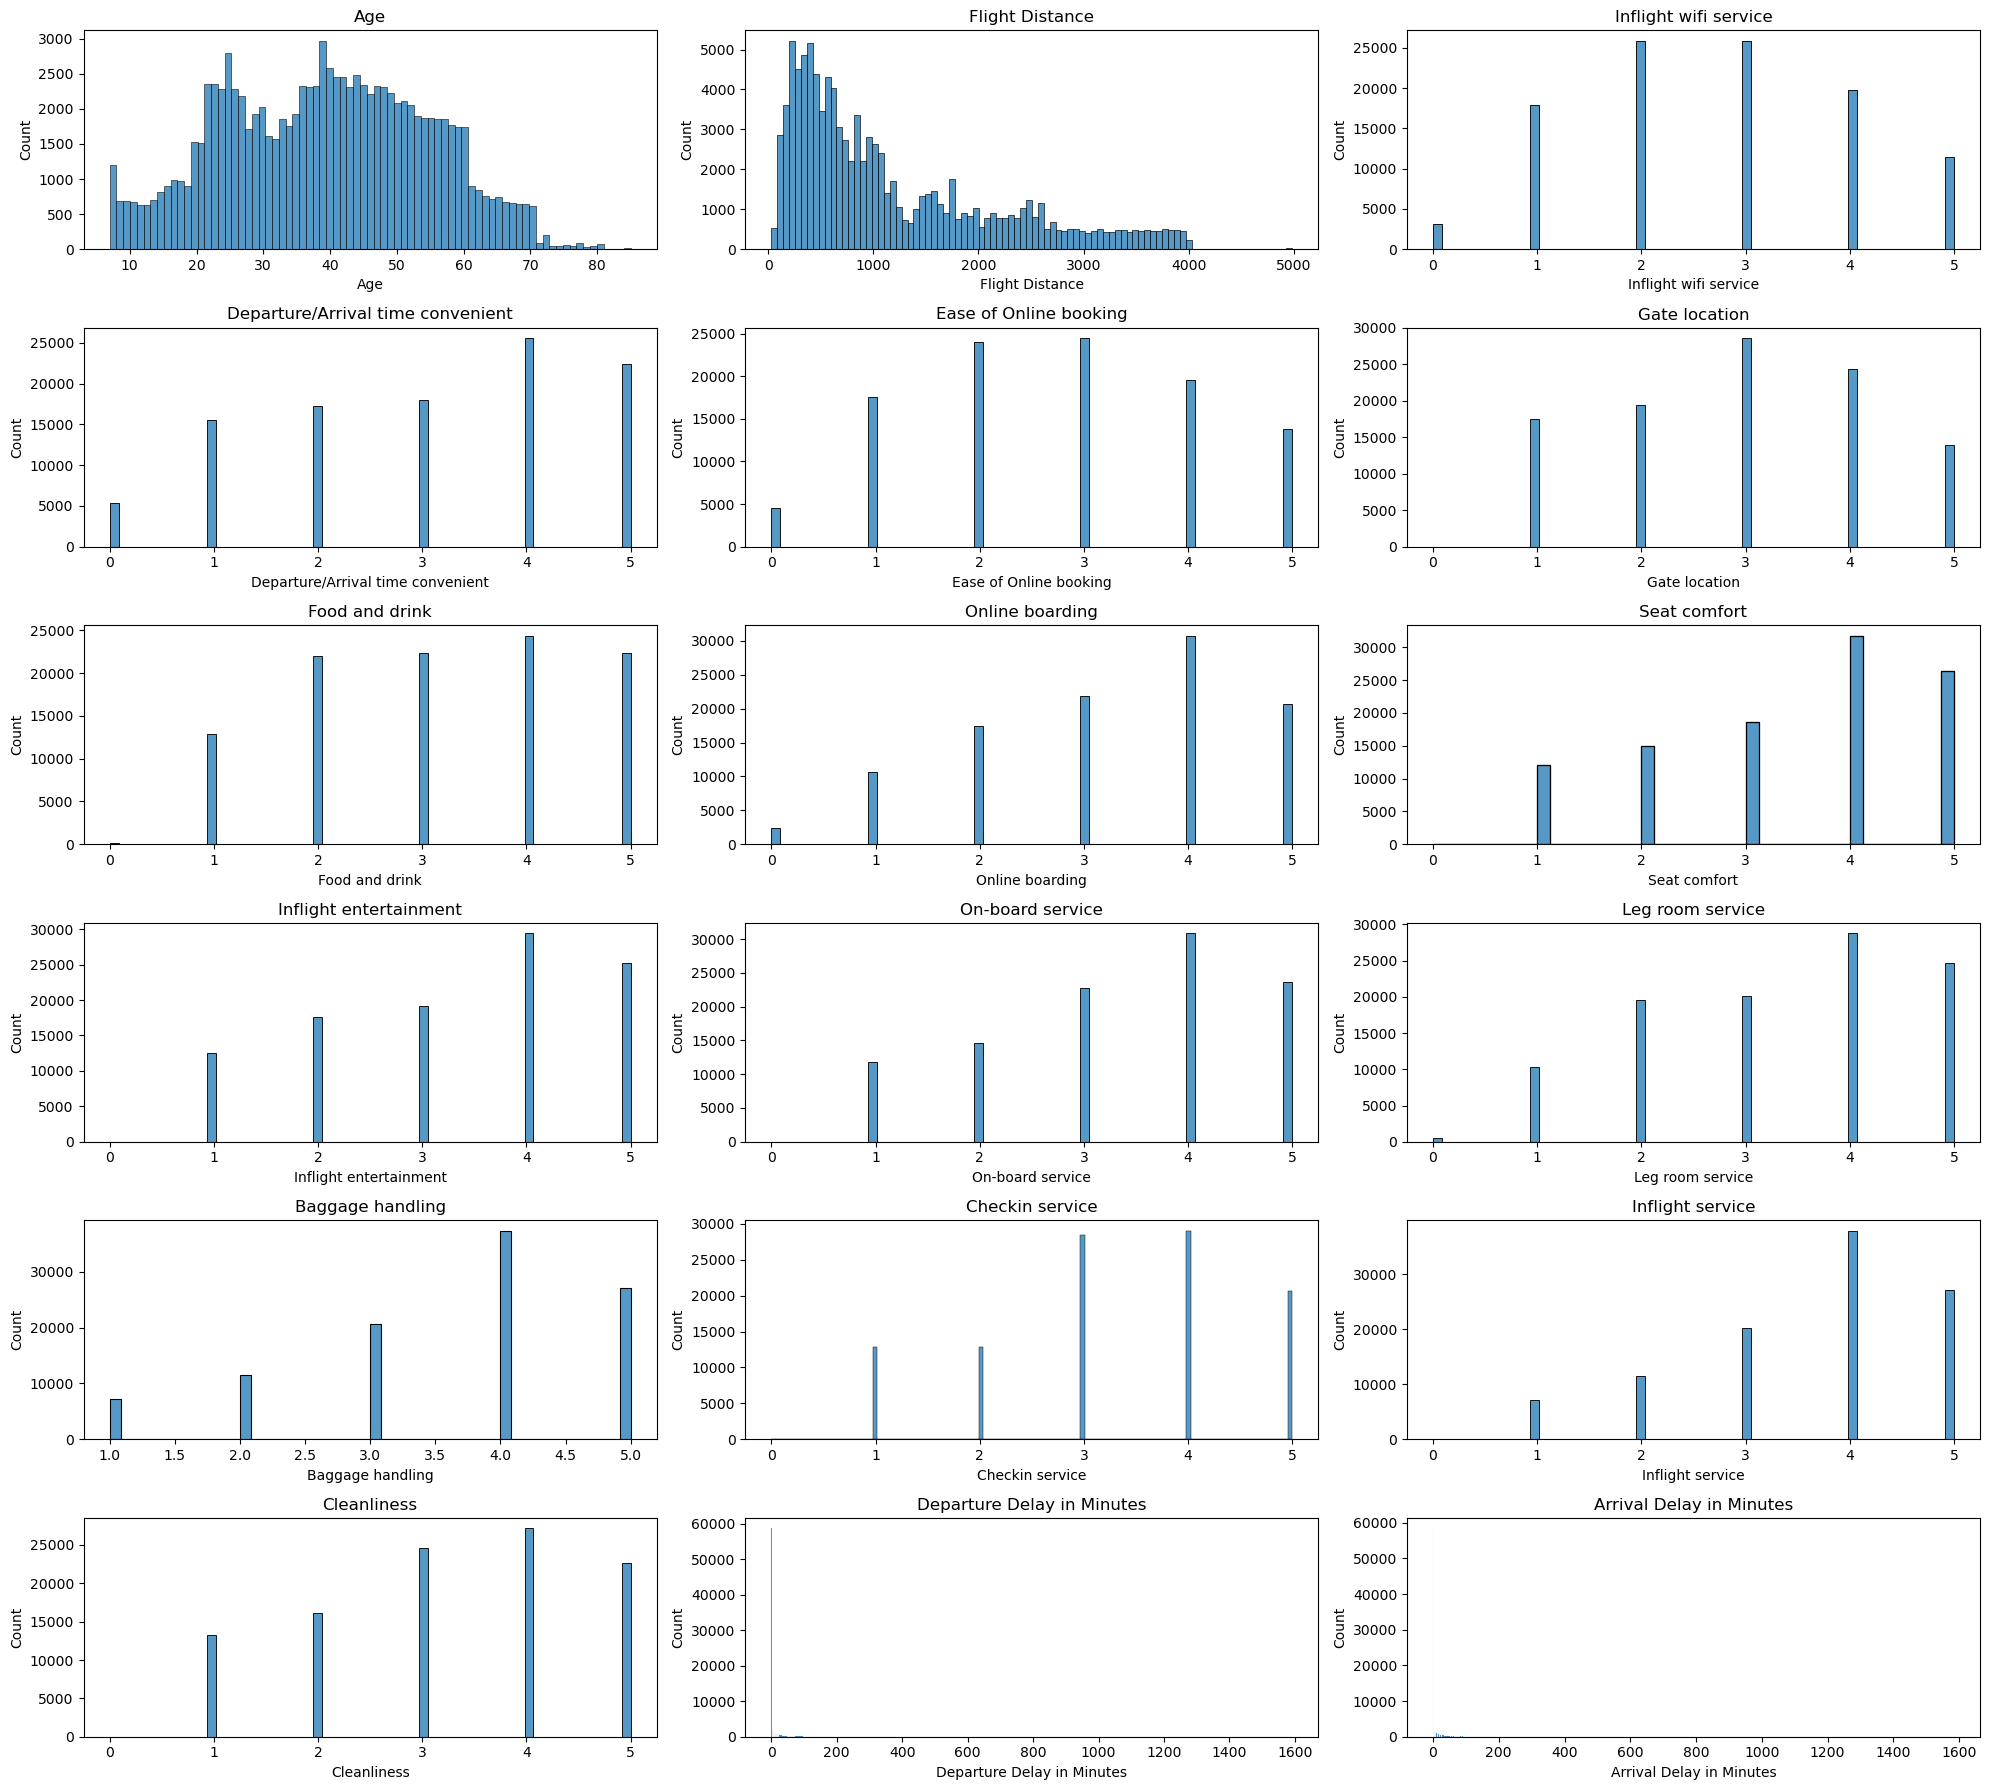

In [196]:
plt.figure(figsize = (20, 18))
for i in range(len(df_num.columns)):
    plt.subplot(6,3,i+1)
    sns.histplot(data=df_num, x = df_num[df_num.columns[i]])
    plt.title('{}'.format(df_num.columns[i]))
    plt.tight_layout();

### Piechart Percentage distribution features

In [75]:
perc_dist = df.copy()

In [77]:
perc_dist.drop(['Age', 'Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes','satisfaction'], 
               axis=1, inplace=True)

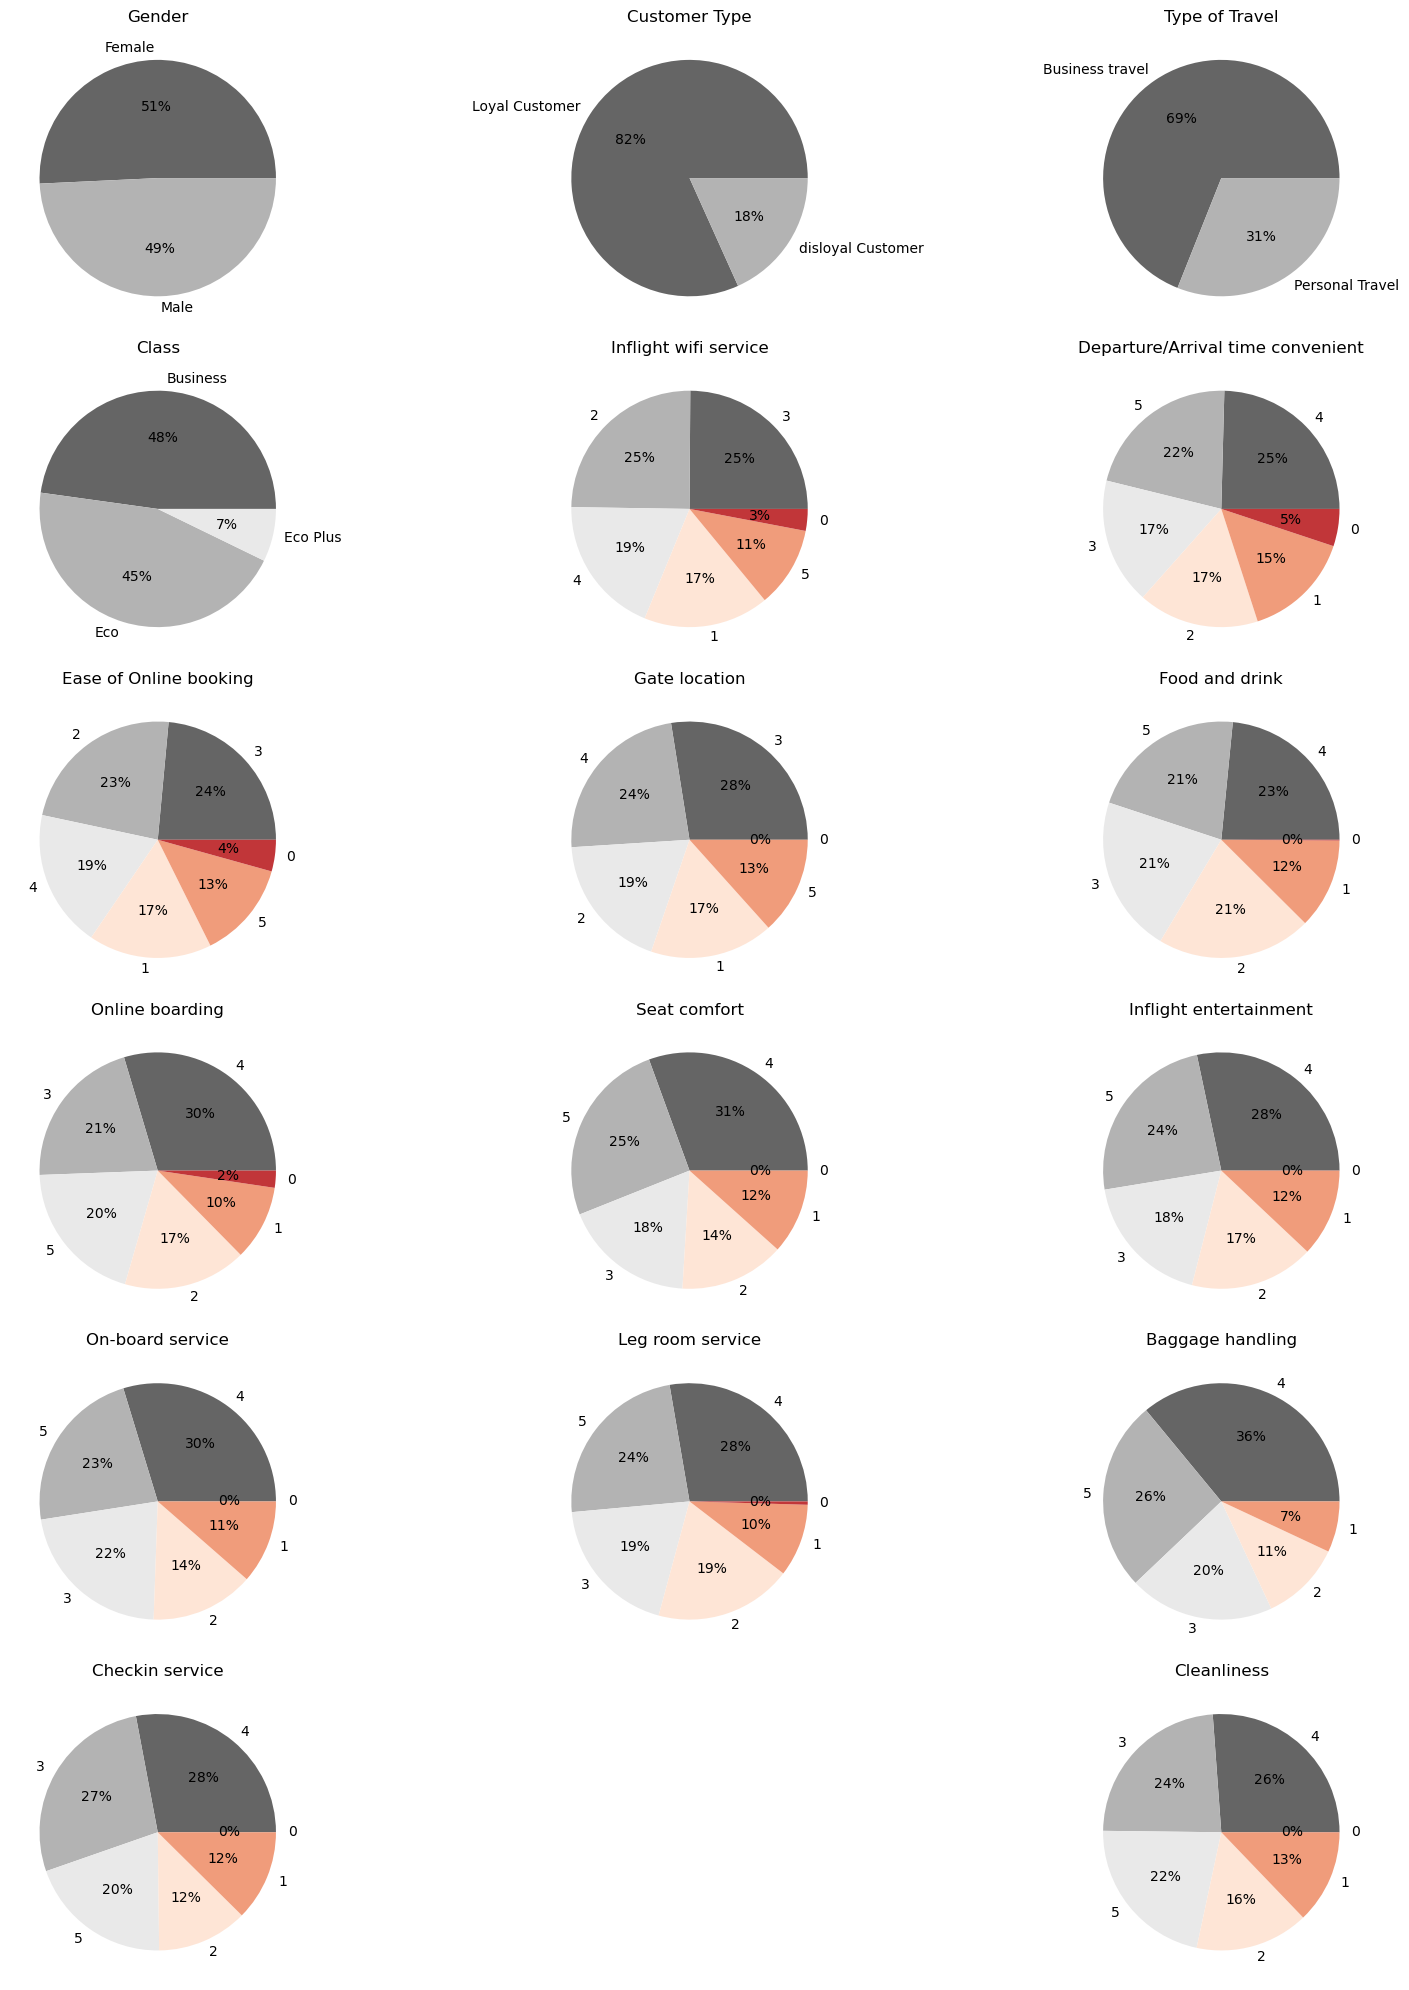

In [92]:
plt.figure(figsize = (18,20))
for i in range(len(perc_dist.columns)):
    plt.subplot(6,3,i+1)
    plt.pie(perc_dist[perc_dist.columns[i]].value_counts(), labels = perc_dist[perc_dist.columns[i]].value_counts().index,
           autopct = '%.0f%%', colors = sns.color_palette('RdGy_r'))
    plt.title('{}'.format(perc_dist.columns[i]))
    plt.tight_layout();

#### Observations:

- The number of men and women in this sample is approximately the same
- The vast majority of the airline's customers are repeat customers
- Most of the clients flew for business rather than personal reasons
- About half of the passengers were in business class
- More than 60% of passengers were satisfied with the luggage transportation service(rated 4-5 out of 5)
- More than 50% of pessengers were compfortable sitting in thier seats(rated 4-5 out of 5)

#### Plotting graph for Target variable 'Satisfaction'

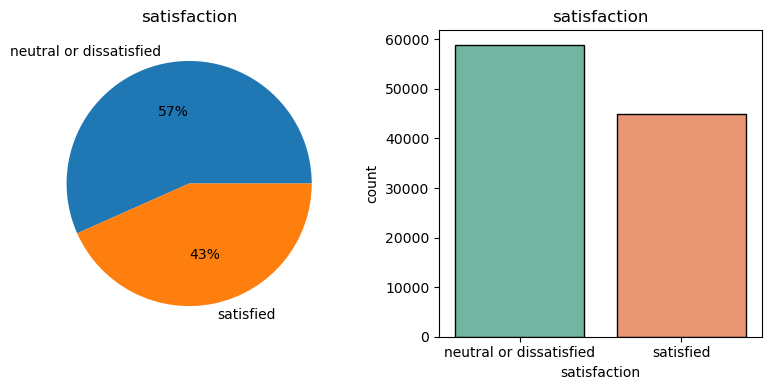

In [101]:
plt.figure(figsize = (8,4))
plt.subplot(1,2,1)
plt.pie(df['satisfaction'].value_counts(), labels = df['satisfaction'].value_counts().index, autopct = '%.0f%%')
plt.title('satisfaction')
plt.subplot(1,2,2)
sns.countplot(data=df, x = 'satisfaction', edgecolor='black', linewidth=1, palette = 'Set2')
plt.title('satisfaction')
plt.tight_layout();

### Bivariate Analysis

### Barplot representation of Numerical features

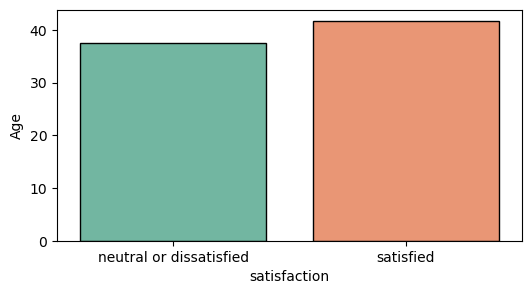

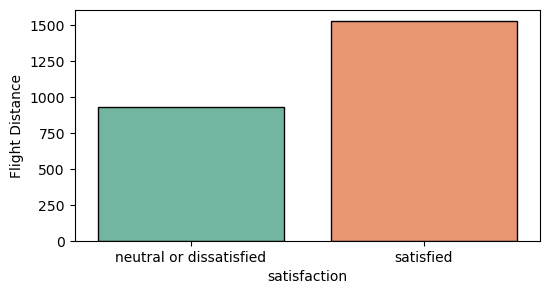

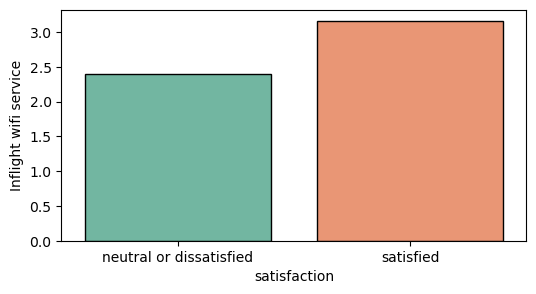

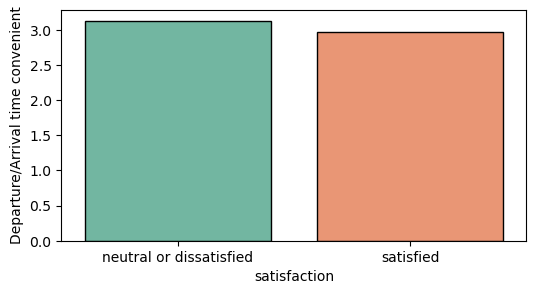

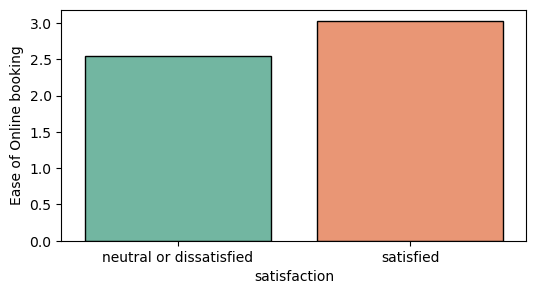

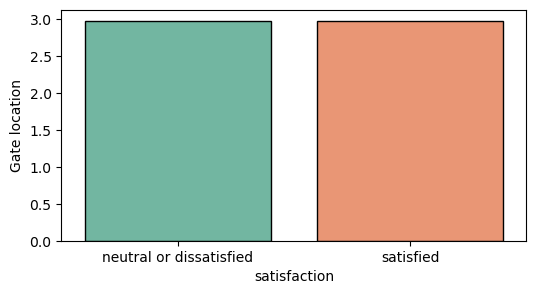

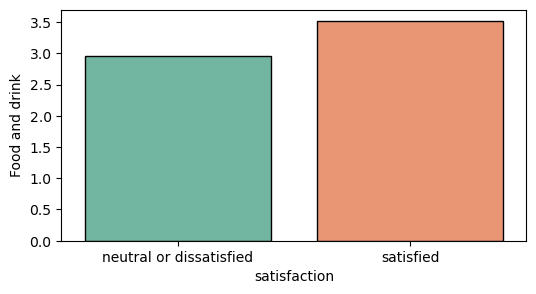

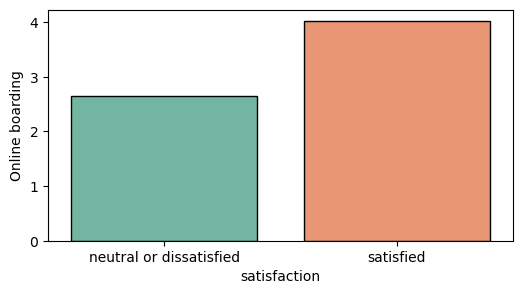

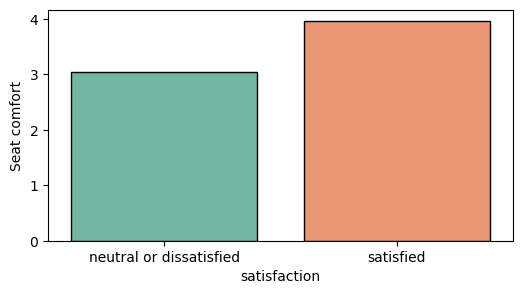

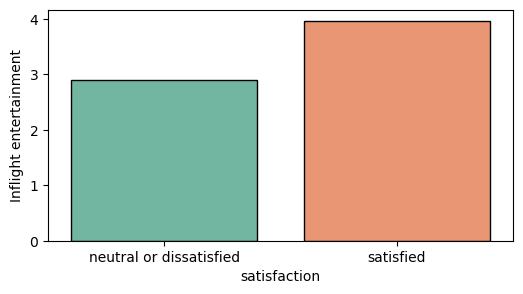

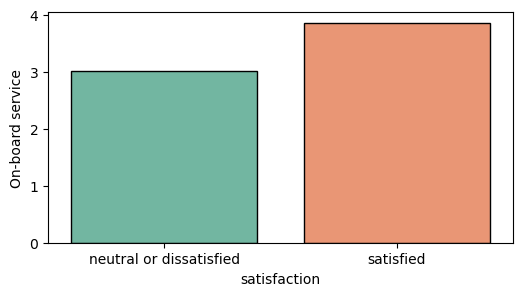

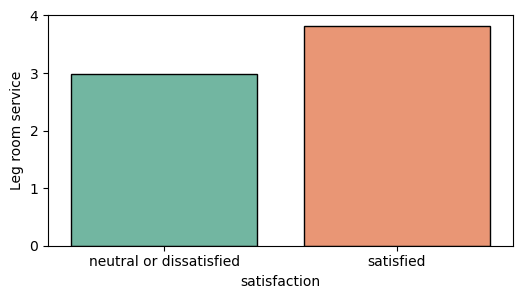

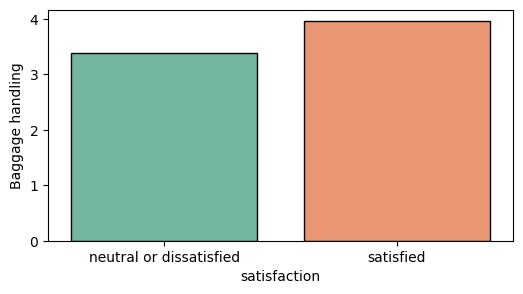

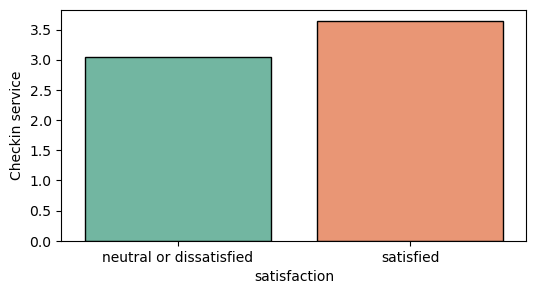

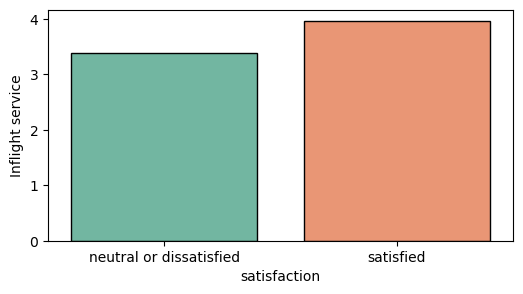

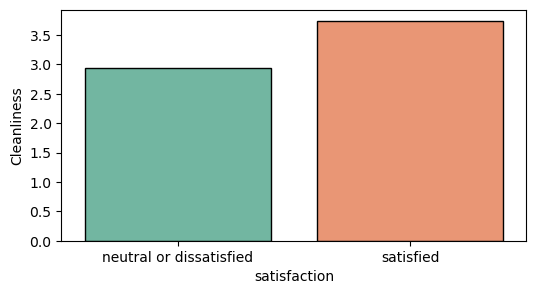

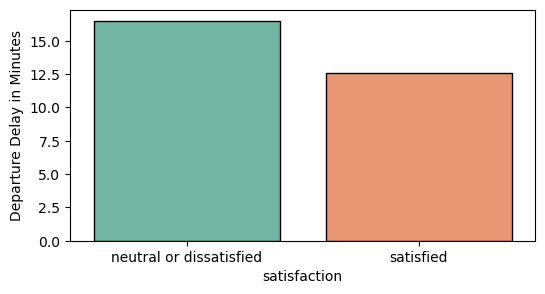

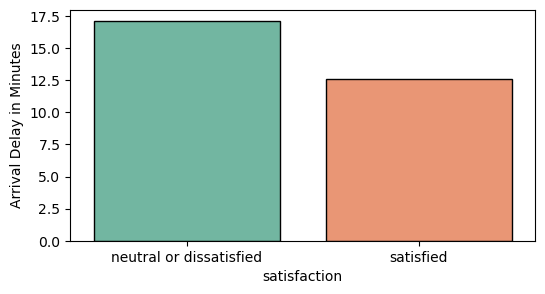

In [127]:
for i in df_num.columns.to_list():
    plt.figure(figsize = (6,3))
    sns.barplot(data=df, x = 'satisfaction', y = i, ci=False, edgecolor='black', linewidth=1, palette='Set2')
    plt.show()

#### Observations:

- From above graphs,it is clear that the age and Gate location, does not play a huge role in flight satisfaction.
- And also the gender does not tell us mush as seen in the earlier plot. hence we can rop these values

### Barplot representation for Categorical features

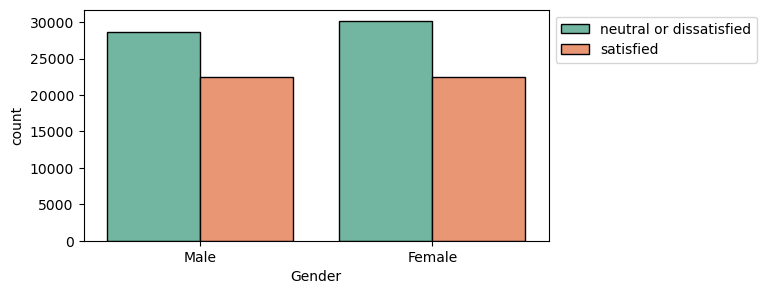

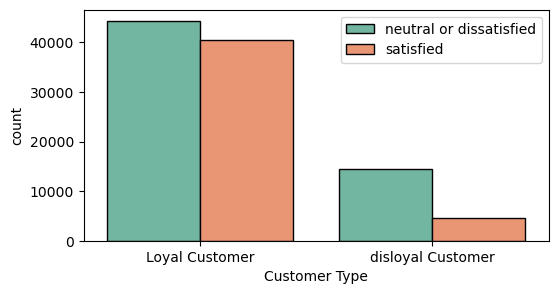

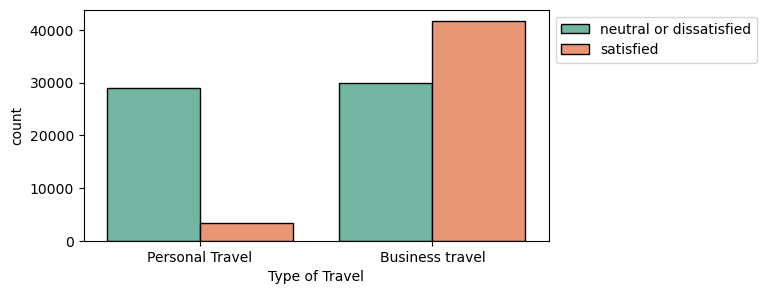

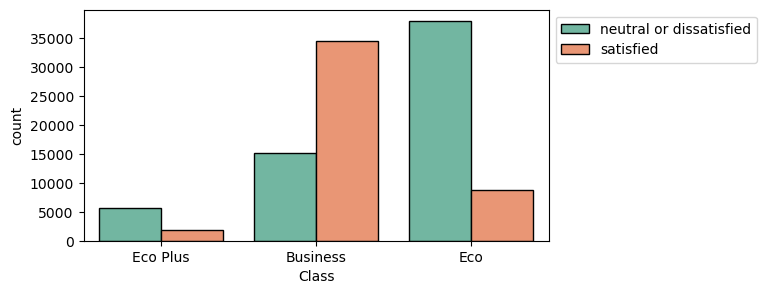

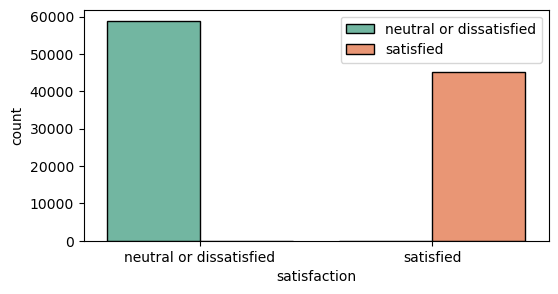

In [133]:
for i in df_cat.columns.to_list():
    plt.figure(figsize = (6,3))
    sns.countplot(data=df, x = i, hue = 'satisfaction', edgecolor='black', linewidth=1, palette='Set2')
    plt.legend(bbox_to_anchor=[1,1])
    plt.show()

#### Observations:

- Gender doesn't play an important role in the satisfaction, as men and women seems to equally concerned about the same factors
- Number of loyal customers for this airline is high, however, the dissatisfaction level is high irrespective of the loyalty. Airline will have to work on maintaining the loyal customers
- Business Travellers seems to be more satisfied with the flight, than the personal travellers
- People in business class seems to be the most satisfied lot, and those in economy class are least satisfied

### Checking Relation b/w Arrival Delay and Departure Delay

In [134]:
df.groupby(['satisfaction'])['Arrival Delay in Minutes'].mean()

satisfaction
neutral or dissatisfied    17.127536
satisfied                  12.630799
Name: Arrival Delay in Minutes, dtype: float64

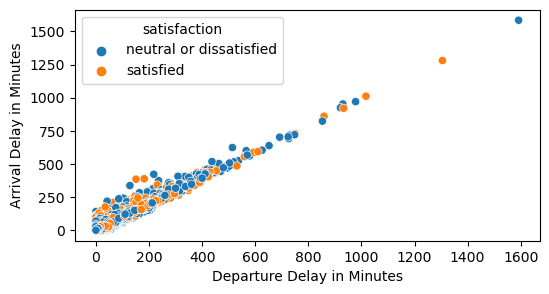

In [137]:
plt.figure(figsize = (6,3))
sns.scatterplot(data=df, x = 'Departure Delay in Minutes', y = 'Arrival Delay in Minutes', hue = 'satisfaction');

#### Observations:

- The arrival and departure delay seems to have a linear relationship, which makes complete sense! And well, there is 1 customer who was satisfied even after a delay of 1300 minutes!

### Checking Relation b/w Flight Distance and Departure Delay

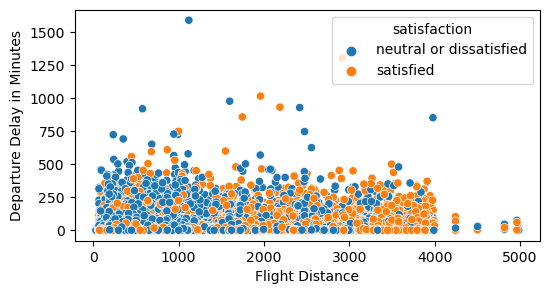

In [139]:
plt.figure(figsize = (6,3))
sns.scatterplot(data=df, x = 'Flight Distance', y = 'Departure Delay in Minutes', hue = 'satisfaction');

#### Observations:

- The most important takeaway here is the longer the flight distance, most passengers are okay with flight delay in departure, which is strance finding from this plot!
- So departure delay is less of a factor for a long distance flight, comparitively, however, short distance travellers does not seem to be excited about the departure delays, which also makes sense

### Age and Customer Type

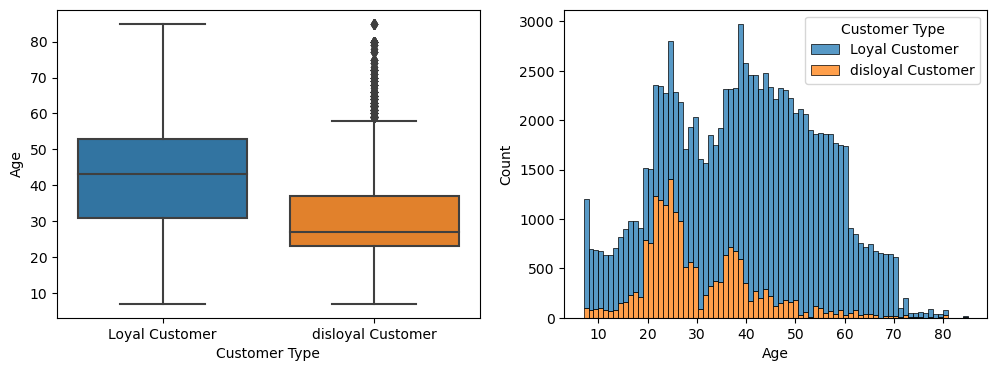

In [164]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.boxplot(data=df, x = 'Customer Type', y = 'Age')
plt.subplot(1,2,2)
sns.histplot(data=df, x = 'Age', hue = 'Customer Type', multiple = 'stack', linewidth=0.5);

#### Observations:

- From above we can conclude that most of the airline's regular customers are between the ages of 30 and 50(their average age is slightly above 40)
- The age range of non-regular customers is slightly smaller (from 25 to 40 years old, on average - a little less than 30)

### Age and Class

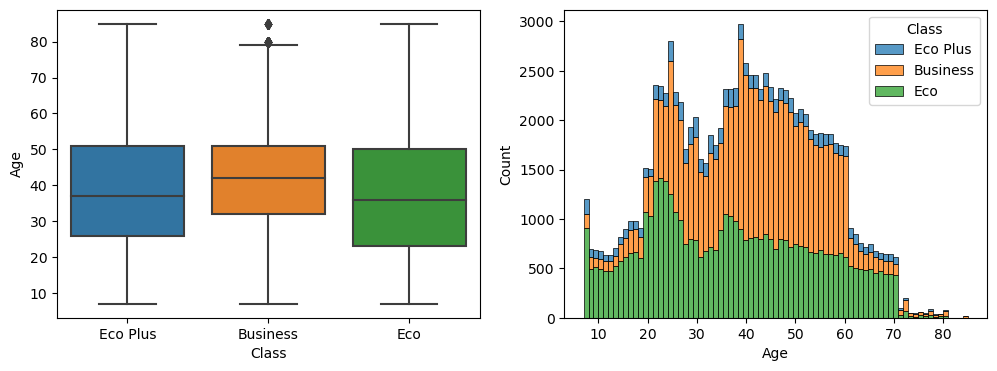

In [163]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.boxplot(data=df, x = 'Class', y = 'Age')
plt.subplot(1,2,2)
sns.histplot(data=df, x = 'Age', hue = 'Class', multiple = 'stack', linewidth=0.5);

- It can be seen that, on average, the age range of those customers who travel in business class is the same (according to the previous box chart) as the age range of regular customers. Based on this observation, it can be assumed that regular customers mainly buy business class for themselves

### Flight Distance and Class

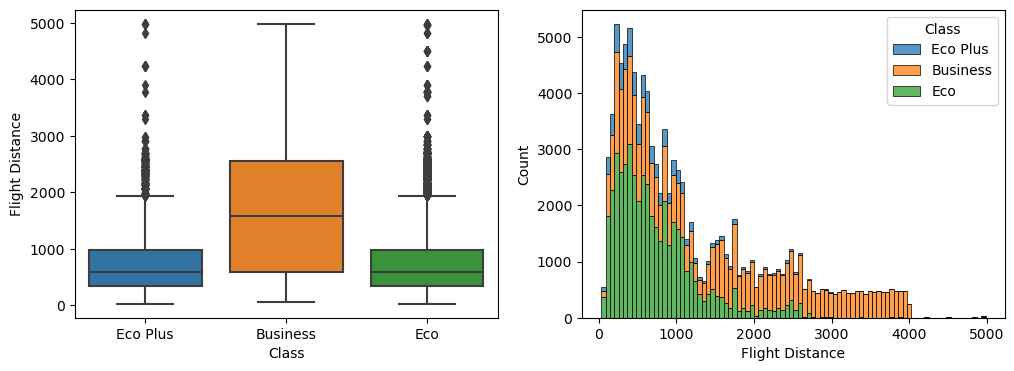

In [162]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.boxplot(data=df, x = 'Class', y = 'Flight Distance')
plt.subplot(1,2,2)
sns.histplot(data=df, x = 'Flight Distance', hue = 'Class', multiple = 'stack', linewidth=0.5);

- customers whose flight distance is long, mostly fly in business class

### Flight Distance with Inflight entertainment and Leg room service

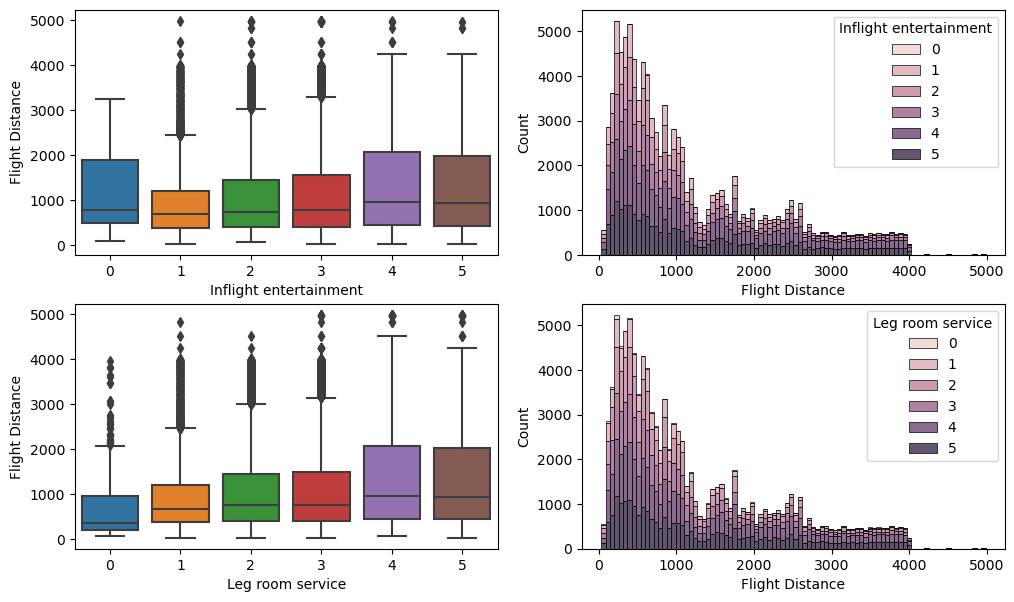

In [165]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (12,7))
sns.boxplot(data=df, x = 'Inflight entertainment', y = 'Flight Distance', ax = axes[0][0])
sns.histplot(data=df, x = 'Flight Distance', hue = 'Inflight entertainment', ax = axes[0][1], multiple = 'stack', linewidth=0.5)
sns.boxplot(data=df, x = 'Leg room service', y = 'Flight Distance', ax = axes[1][0])
sns.histplot(data=df, x = 'Flight Distance', hue = 'Leg room service', ax = axes[1][1], multiple = 'stack', linewidth=0.5);

#### Observations:

- The more distance an aircraft passenger travels (respectively, the longer they are in flight)
- The more they are satisfied with the entertainment in flight and the extra legroom (on average).

### Checking correlation b/w Numerical variables

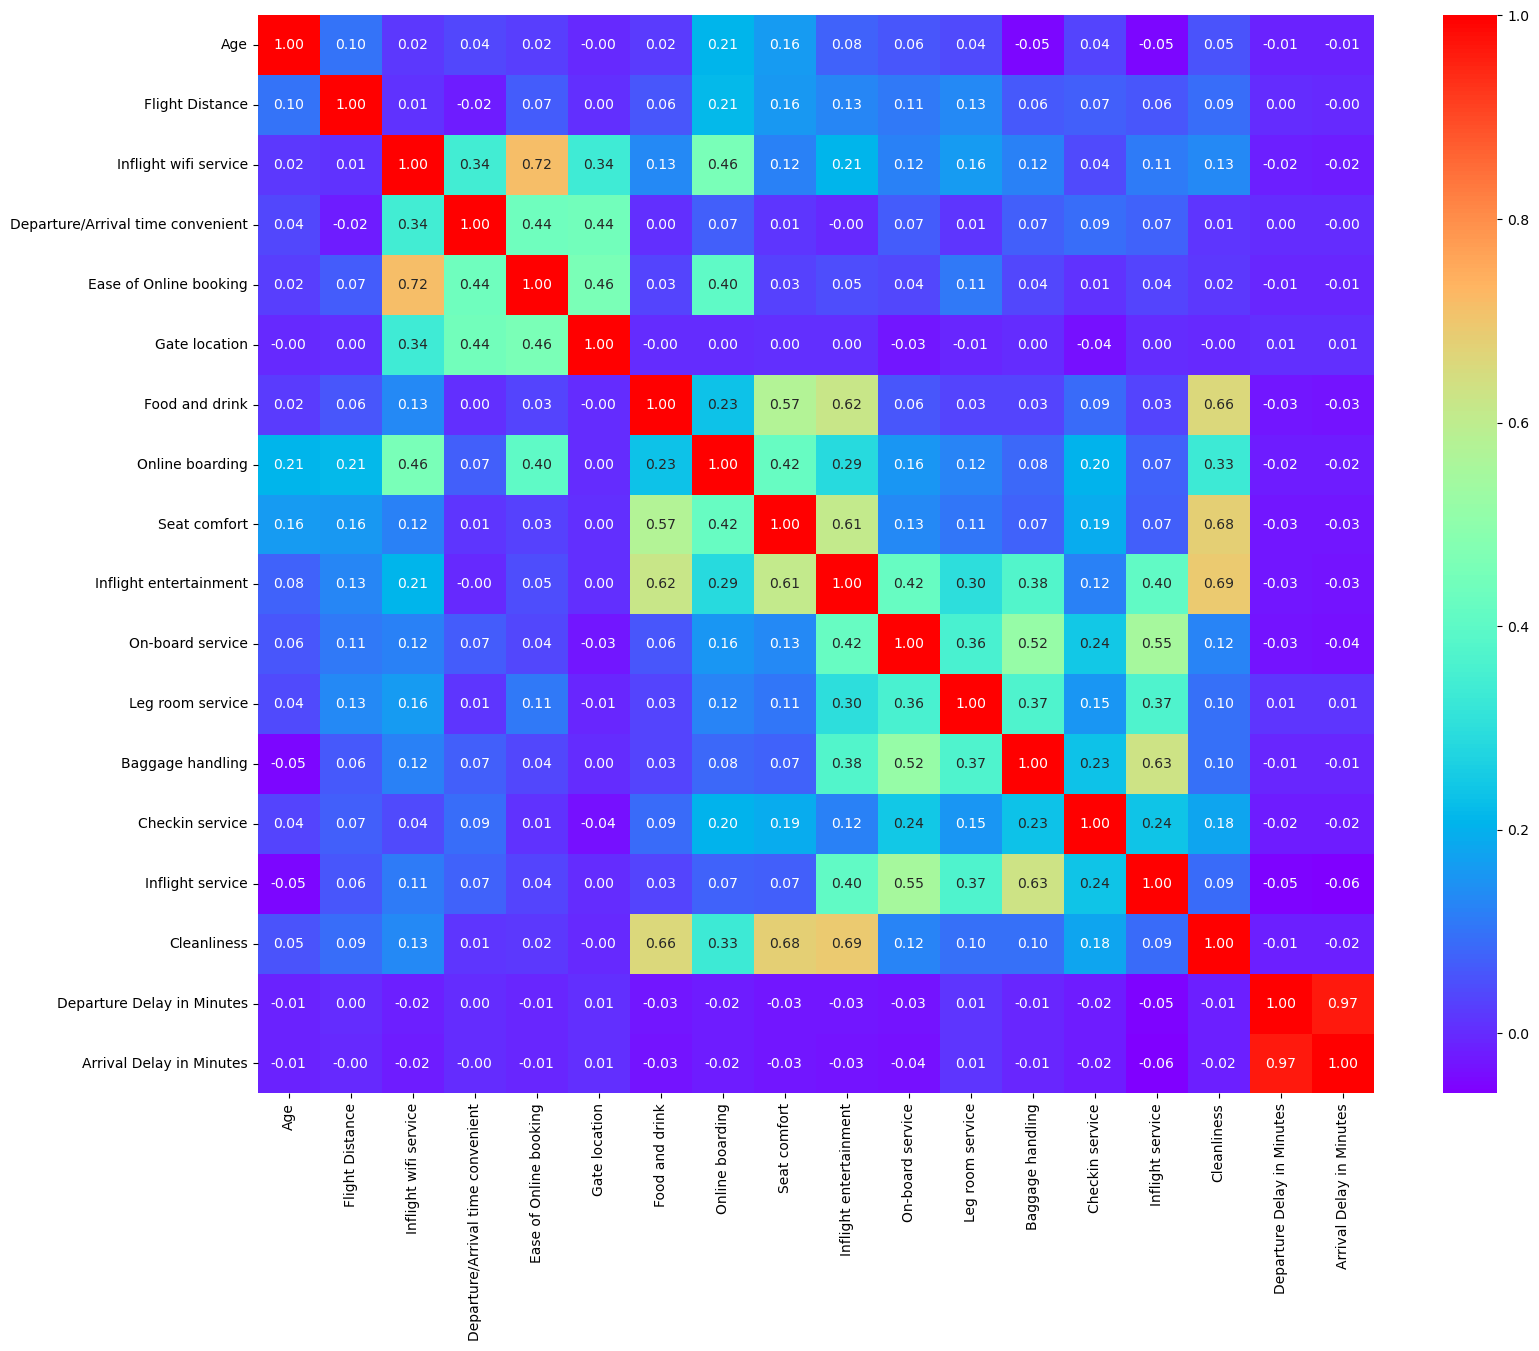

In [167]:
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='rainbow');

- Departure delay in minutes and Arrival delay in minutes are highly correlated with each other

#### Checking for Outliers in a dataset

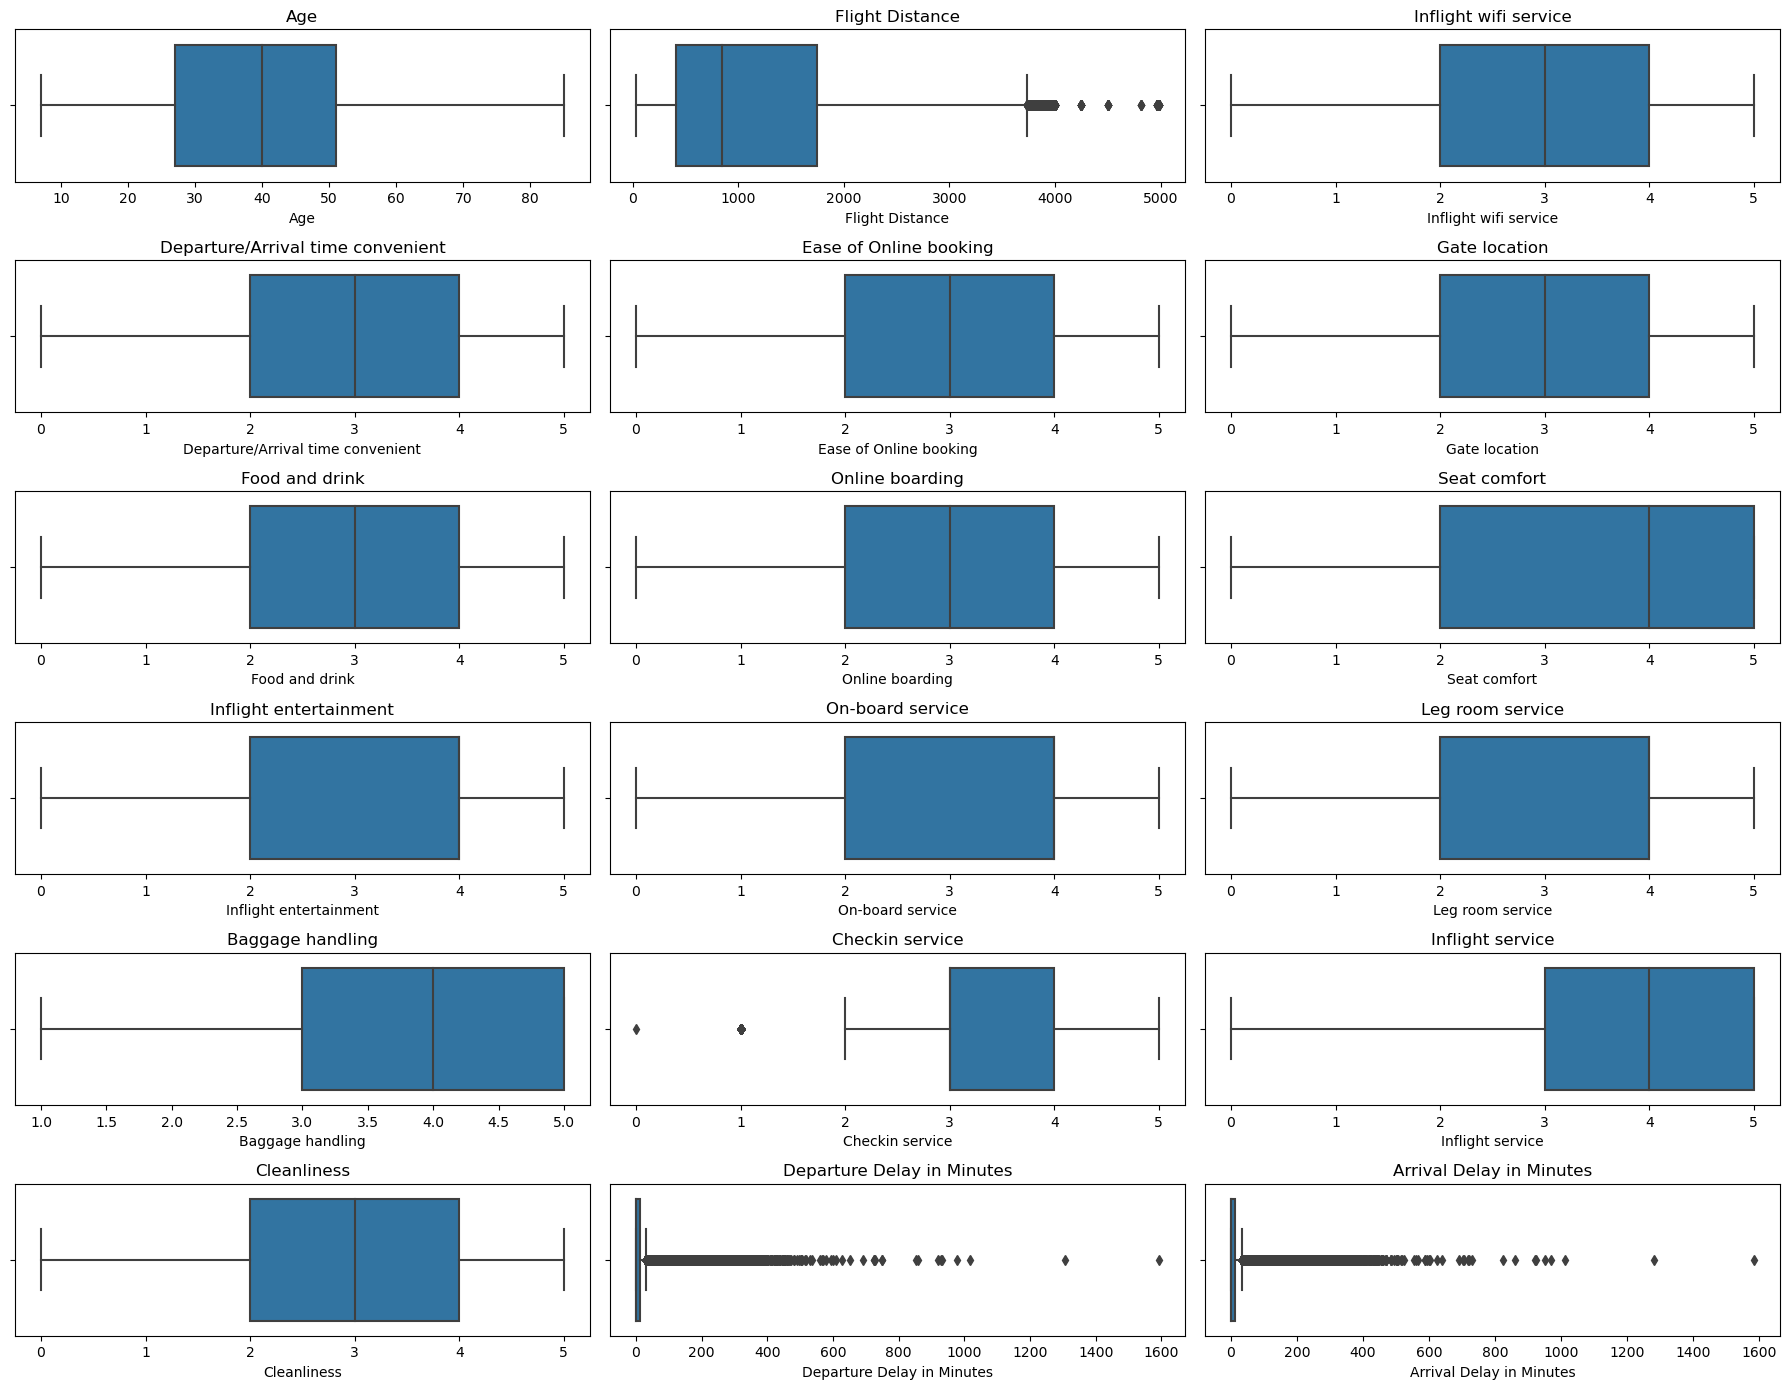

In [197]:
for i in range(len(df_num.columns)):
    plt.subplot(6,3,i+1)
    sns.boxplot(data=df_num, x = df_num[df_num.columns[i]])
    plt.title('{}'.format(df_num.columns[i]))
    plt.tight_layout();

- There are outliers present in Fight Distance, Departure delay in minutes and Arrival delay in minutes

### Data pre-processing and Feature engineering

In [216]:
df1 = df.copy()

In [217]:
le = LabelEncoder()
df1['satisfaction'] = le.fit_transform(df1['satisfaction'])

In [218]:
df1['satisfaction'].value_counts()

0    58879
1    45025
Name: satisfaction, dtype: int64

#### Now we will going to create dummy variables by converting categorical variables into numerical variables

In [219]:
df1 = pd.get_dummies(df1, drop_first=True)

In [220]:
df1.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0,1,0,1,0,1
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0,1,1,0,0,0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1,0,0,0,0,0
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0,0,0,0,0,0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1,1,0,0,0,0


### Splitting the dataset into Train and Test set (70:30) ratio

In [221]:
x = df1.drop('satisfaction', axis=1) # Independent variables
y = df1[['satisfaction']] # Dependent variable

In [222]:
x.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,1,0,1,0,1
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,1,1,0,0,0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,0,0,0,0,0
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0,0,0,0,0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1,0,0,0,0


In [223]:
y.head()

,satisfaction
0,0
1,0
2,1
3,0
4,1


#### Checking shape of Independent and Dependent variable

In [224]:
print('Independent variables:', x.shape)
print('Dependent variable:', y.shape)

Independent variables: (103904, 23)
Dependent variable: (103904, 1)


In [225]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state=1)

In [226]:
x_train.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
5019,17,1891,2,2,2,2,4,4,4,4,5,3,5,5,4,4,0,0.0,1,0,0,0,0
81741,50,1744,1,1,2,1,5,2,1,1,1,1,1,4,1,1,0,28.0,0,0,0,0,0
65639,53,600,4,4,4,4,4,4,4,4,2,1,3,1,2,4,0,0.0,1,0,0,1,0
56888,52,2461,4,4,1,4,3,4,5,5,5,5,5,3,5,4,0,0.0,1,0,0,0,0
65045,56,270,1,0,2,2,3,2,3,3,5,5,5,2,2,3,0,0.0,0,1,0,1,0


In [227]:
y_train.head()

,satisfaction
5019,1
81741,0
65639,0
56888,1
65045,0


#### Checking shape for Train and Test set

In [228]:
print('Train set:', x_train.shape)
print('Test set:', x_test.shape)

Train set: (72732, 23)
Test set: (31172, 23)


### Data Modelling

### Logistic Regression

In [229]:
model1 = LogisticRegression()
model1.fit(x_train, y_train)

LogisticRegression()

#### Checking Accuracy score for Train and Test set

In [231]:
print('Accuracy score for Train set:', model1.score(x_train, y_train))
print('Accuracy score for Test set:', model1.score(x_test, y_test))

Accuracy score for Train set: 0.8071000384974977
Accuracy score for Test set: 0.8050814833825227


#### Checking Probability for Train and Test set

In [233]:
lr_train = model1.predict_proba(x_train)
lr_test = model1.predict_proba(x_test)

In [235]:
pd.DataFrame(lr_train).head()

,0,1
0,0.144263,0.855737
1,0.862498,0.137502
2,0.669695,0.330305
3,0.251514,0.748486
4,0.675742,0.324258


In [236]:
pd.DataFrame(lr_test).head()

,0,1
0,0.194727,0.805273
1,0.931223,0.068777
2,0.773051,0.226949
3,0.732118,0.267882
4,0.955418,0.044582


#### Checking Confusion matrix and Classification report for Train and Test set

In [240]:
print('Confusion matrix for train set:\n', metrics.confusion_matrix(y_train, model1.predict(x_train)),'\n')
print('Confusion matrix for test set:\n', metrics.confusion_matrix(y_test, model1.predict(x_test)))

Confusion matrix for train set:
 [[32838  8349]
 [ 5681 25864]] 

Confusion matrix for test set:
 [[14061  3631]
 [ 2445 11035]]


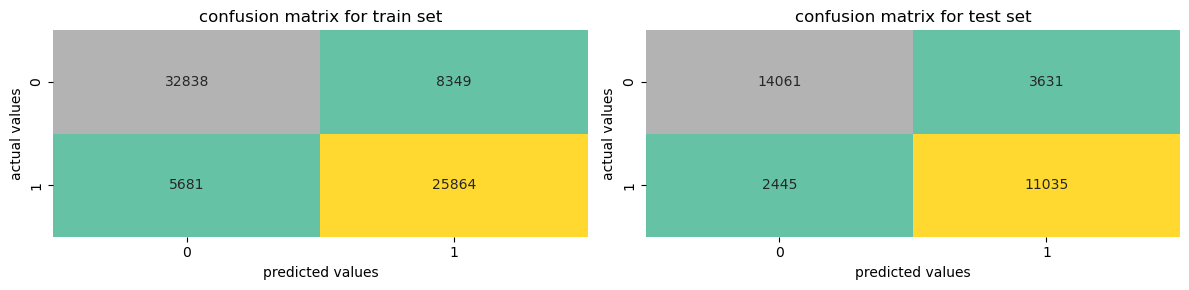

In [253]:
plt.figure(figsize = (12,3))
plt.subplot(1,2,1)
sns.heatmap((metrics.confusion_matrix(y_train, model1.predict(x_train))), annot=True, fmt='.5g', cbar=False, cmap='Set2')
plt.title('confusion matrix for train set')
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.subplot(1,2,2)
sns.heatmap((metrics.confusion_matrix(y_test, model1.predict(x_test))), annot=True, fmt='.5g', cbar=False, cmap='Set2')
plt.title('confusion matrix for test set')
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.tight_layout();

In [243]:
print('Classification report for train set:\n', metrics.classification_report(y_train, model1.predict(x_train),
                                                                             target_names = ['neutral or dissatisfaction',
                                                                                            'satisfaction']),'\n')
print('Classification report for test set:\n', metrics.classification_report(y_test, model1.predict(x_test),
                                                                            target_names = ['neutral or dissatisfaction',
                                                                                           'satisfaction']))

Classification report for train set:
                             precision    recall  f1-score   support

neutral or dissatisfaction       0.85      0.80      0.82     41187
              satisfaction       0.76      0.82      0.79     31545

                  accuracy                           0.81     72732
                 macro avg       0.80      0.81      0.81     72732
              weighted avg       0.81      0.81      0.81     72732
 

Classification report for test set:
                             precision    recall  f1-score   support

neutral or dissatisfaction       0.85      0.79      0.82     17692
              satisfaction       0.75      0.82      0.78     13480

                  accuracy                           0.81     31172
                 macro avg       0.80      0.81      0.80     31172
              weighted avg       0.81      0.81      0.81     31172



#### Plotting AUC-ROC curve for Train and Test set

AUC score for train set: 0.8684787482726058
AUC score for test set: 0.8673023306481964


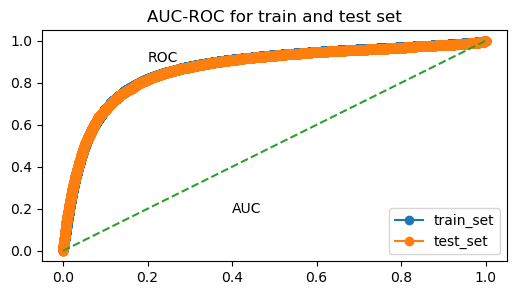

In [269]:
auc_train = roc_auc_score(y_train, model1.predict_proba(x_train)[:,1])
print('AUC score for train set:', auc_train)
auc_test = roc_auc_score(y_test, model1.predict_proba(x_test)[:,1])
print('AUC score for test set:', auc_test)

train_fpr, train_tpr, train_threshold = roc_curve(y_train, model1.predict_proba(x_train)[:,1])
plt.figure(figsize = (6,3))
plt.plot(train_fpr, train_tpr, marker = 'o')

test_fpr, test_tpr, test_threshold = roc_curve(y_test, model1.predict_proba(x_test)[:,1])
plt.plot(test_fpr, test_tpr, marker = 'o')
plt.plot([0,1],[0,1], linestyle = '--')
plt.legend(labels = ['train_set', 'test_set'])
plt.annotate('ROC', (0.2, 0.90))
plt.annotate('AUC', (0.4, 0.18))
plt.title('AUC-ROC for train and test set');

#### Checking Coefficient for all Predictor variables

- Predictor variables having high coefficient is the best fit to predict the classes for response variable

In [275]:
lr = pd.DataFrame(model1.coef_, columns = x_train.columns, index = ['Coef']).T.sort_values('Coef', ascending=False)
lr

,Coef
Online boarding,0.720738
Inflight wifi service,0.400791
Inflight entertainment,0.299743
On-board service,0.202790
Leg room service,0.158851
Ease of Online booking,0.086961
Seat comfort,0.047748
Departure Delay in Minutes,0.010065
Flight Distance,0.000148
Arrival Delay in Minutes,-0.014737


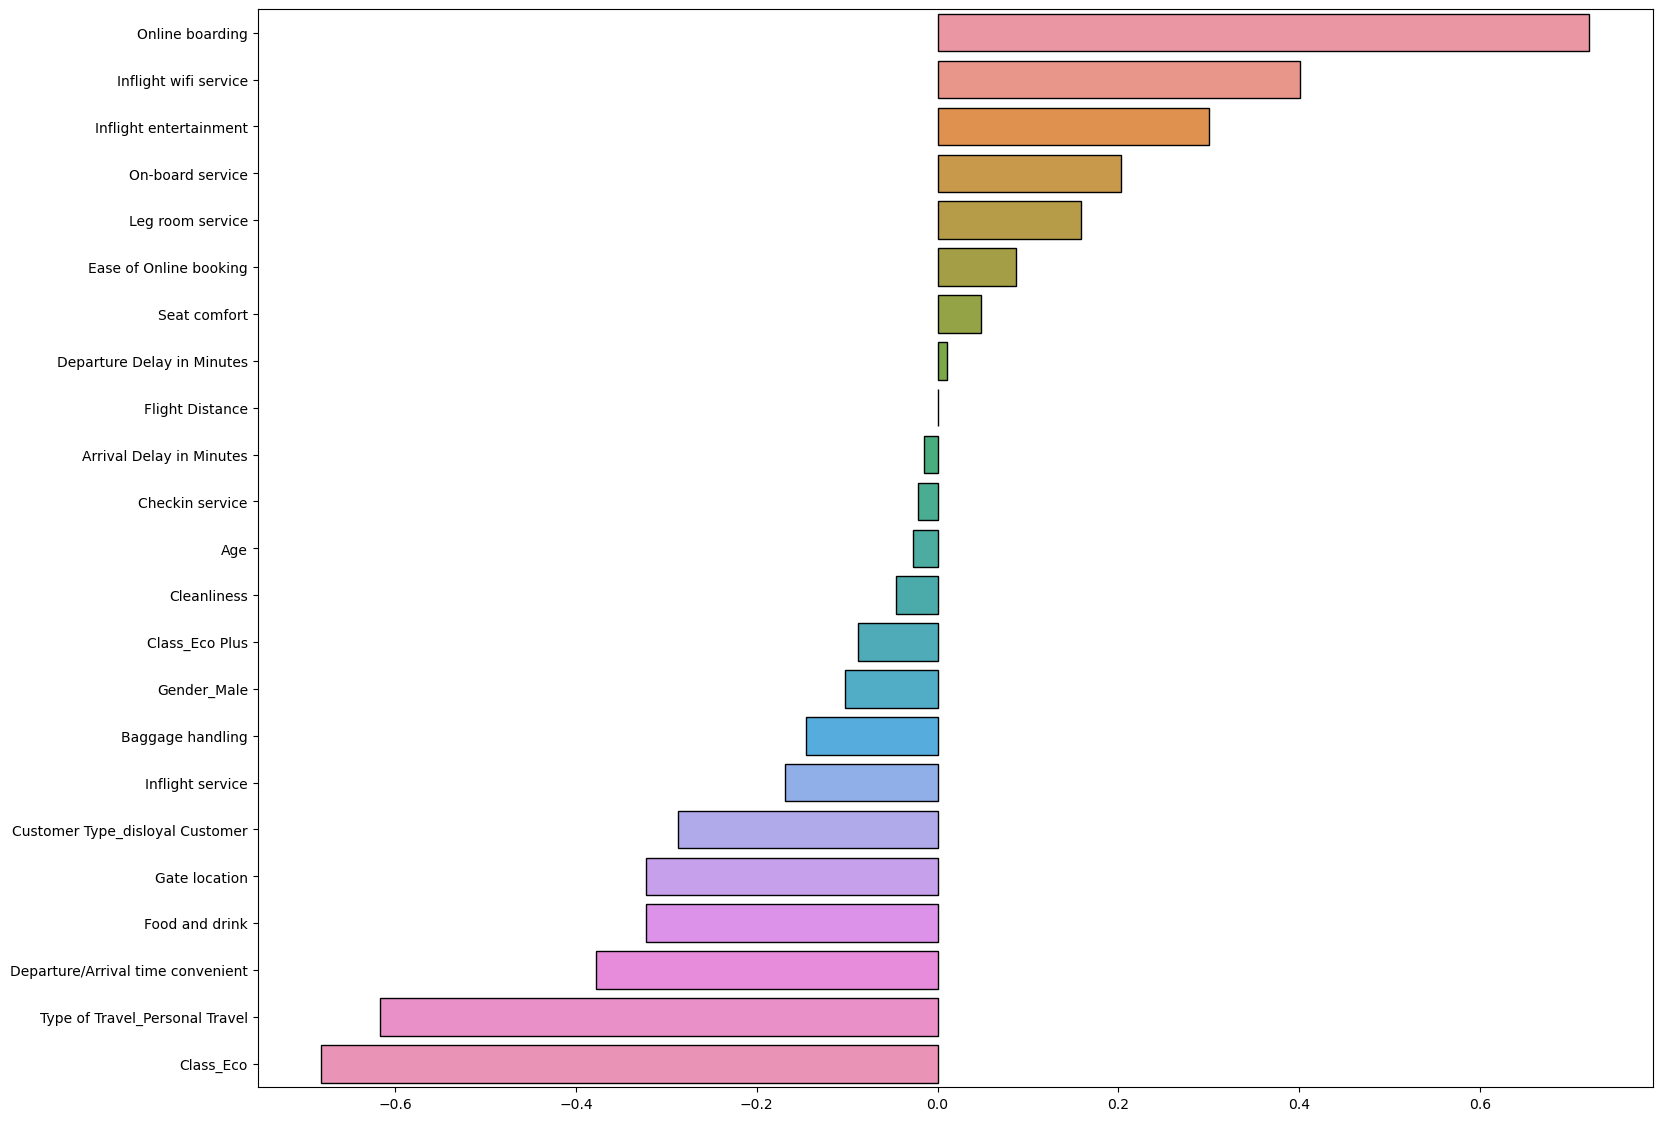

In [282]:
sns.barplot(x = lr['Coef'].values, y = lr.index, edgecolor='black', linewidth=1);

- Predictor variables having high coefficient is the best fit to separate the classes of response variable
- Online boarding having high coefficient
- Whereas Class_Eco is inversely related with response variable

### LDA

In [283]:
model2 = LinearDiscriminantAnalysis()
model2.fit(x_train, y_train)

LinearDiscriminantAnalysis()

#### Checking Accuracy for Train and Test set

In [284]:
print('Accuracy score for Train set:', model2.score(x_train, y_train))
print('Accuracy score for Test set:', model2.score(x_test, y_test))

Accuracy score for Train set: 0.8718858274212177
Accuracy score for Test set: 0.8730270755806493


#### Checking Coefficient of all Predictor variables

- If Coefficient is large in magnitude or absolute value and different from zero than corresponding independent variables play a significant role in correctly classifying observation into classes
- If Coefficient is small in magnitude or absolute value and close to zero than corresponding independent variables does not play a significant role in correctly classifying observation into classes

In [287]:
lda = pd.DataFrame(model2.coef_, columns = x_train.columns, index = ['Coef']).T.sort_values('Coef', ascending=False)
lda

,Coef
Online boarding,0.730402
Inflight wifi service,0.610846
Checkin service,0.340729
On-board service,0.315126
Leg room service,0.295708
Cleanliness,0.237341
Inflight service,0.148849
Inflight entertainment,0.142547
Baggage handling,0.141719
Gender_Male,0.061561


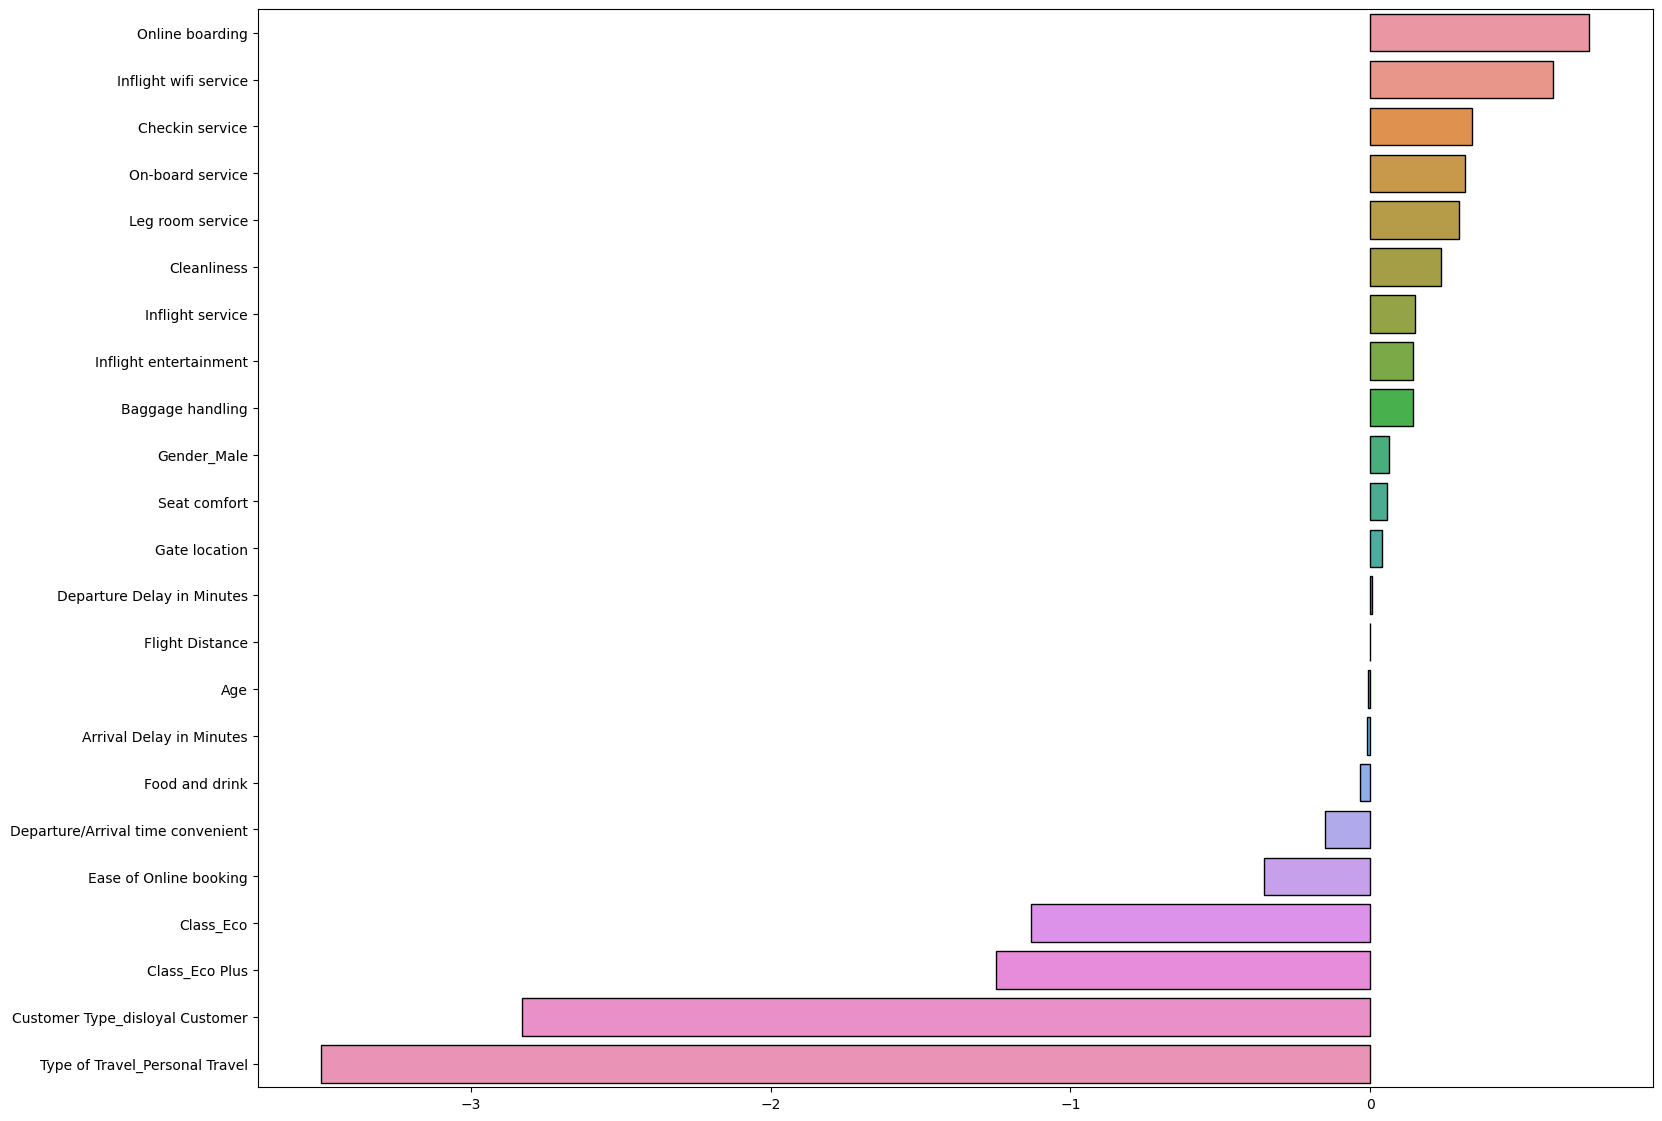

In [288]:
sns.barplot(x = lda['Coef'].values, y = lda.index, edgecolor='black', linewidth=1);

#### Checking Confusion matrix and Classification report for Train and Test set

In [289]:
print('Confusion matrix for train set:\n', metrics.confusion_matrix(y_train, model2.predict(x_train)),'\n')
print('Confusion matrix for test set:\n', metrics.confusion_matrix(y_test, model2.predict(x_test)))

Confusion matrix for train set:
 [[37069  4118]
 [ 5200 26345]] 

Confusion matrix for test set:
 [[15937  1755]
 [ 2203 11277]]


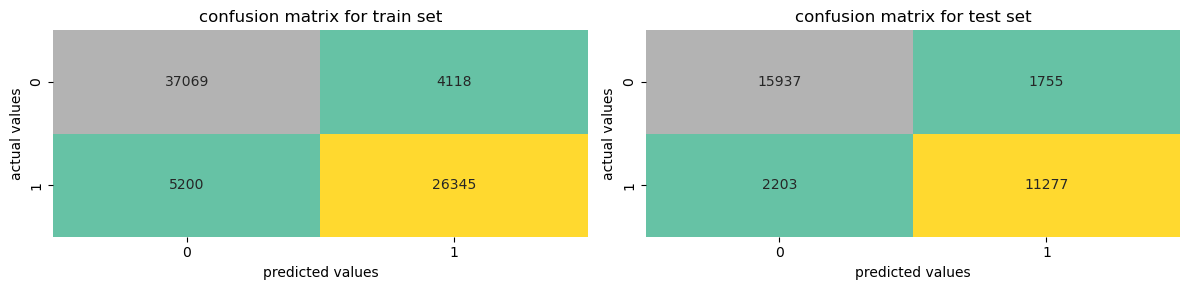

In [291]:
plt.figure(figsize = (12,3))
plt.subplot(1,2,1)
sns.heatmap((metrics.confusion_matrix(y_train, model2.predict(x_train))), annot=True, fmt='.5g', cbar=False, cmap='Set2')
plt.title('confusion matrix for train set')
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.subplot(1,2,2)
sns.heatmap((metrics.confusion_matrix(y_test, model2.predict(x_test))), annot=True, fmt='.5g', cbar=False, cmap='Set2')
plt.title('confusion matrix for test set')
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.tight_layout();

In [290]:
print('Classification report for train set:\n', metrics.classification_report(y_train, model2.predict(x_train),
                                                                             target_names = ['neutral or dissatisfaction',
                                                                                            'satisfaction']),'\n')
print('Classification report for test set:\n', metrics.classification_report(y_test, model2.predict(x_test),
                                                                            target_names = ['neutral or dissatisfaction',
                                                                                           'satisfaction']))

Classification report for train set:
                             precision    recall  f1-score   support

neutral or dissatisfaction       0.88      0.90      0.89     41187
              satisfaction       0.86      0.84      0.85     31545

                  accuracy                           0.87     72732
                 macro avg       0.87      0.87      0.87     72732
              weighted avg       0.87      0.87      0.87     72732
 

Classification report for test set:
                             precision    recall  f1-score   support

neutral or dissatisfaction       0.88      0.90      0.89     17692
              satisfaction       0.87      0.84      0.85     13480

                  accuracy                           0.87     31172
                 macro avg       0.87      0.87      0.87     31172
              weighted avg       0.87      0.87      0.87     31172



AUC score for train set: 0.9253710001020092
AUC score for test set: 0.9243488817222624


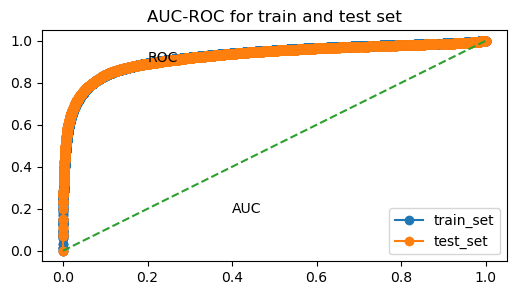

In [292]:
auc_train = roc_auc_score(y_train, model2.predict_proba(x_train)[:,1])
print('AUC score for train set:', auc_train)
auc_test = roc_auc_score(y_test, model2.predict_proba(x_test)[:,1])
print('AUC score for test set:', auc_test)

train_fpr, train_tpr, train_threshold = roc_curve(y_train, model2.predict_proba(x_train)[:,1])
plt.figure(figsize = (6,3))
plt.plot(train_fpr, train_tpr, marker = 'o')

test_fpr, test_tpr, test_threshold = roc_curve(y_test, model2.predict_proba(x_test)[:,1])
plt.plot(test_fpr, test_tpr, marker = 'o')
plt.plot([0,1],[0,1], linestyle = '--')
plt.legend(labels = ['train_set', 'test_set'])
plt.annotate('ROC', (0.2, 0.90))
plt.annotate('AUC', (0.4, 0.18))
plt.title('AUC-ROC for train and test set');

### Decision Tree

In [293]:
model3 = DecisionTreeClassifier(criterion = 'gini', random_state=1)
model3.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

#### Checking Accuracy for Train and Test set

In [294]:
print('Accuracy score for Train set:', model3.score(x_train, y_train))
print('Accuracy score for Test set:', model3.score(x_test, y_test))

Accuracy score for Train set: 1.0
Accuracy score for Test set: 0.9422558706531503


In [295]:
y_train_label = ['No', 'Yes']

In [296]:
df_tree_satisfaction = open('C:\Data Science\Resume_Projects\df_tree_satisfaction.dot', 'w')

In [297]:
dot_data = tree.export_graphviz(model3, out_file = df_tree_satisfaction, feature_names = list(x_train),
                               class_names = list(y_train_label))

In [298]:
df_tree_satisfaction.close()

-              The above code will save a .dot file in our working directory.
-              WebGraphviz is Graphviz in the Browser.
-              Copy paste the contents of the file into the link below to get the visualization
http://webgraphviz.com/

#### Checking Important features having Higher Gini Index or Gini Gain

In [302]:
dt = pd.DataFrame(model3.feature_importances_, columns = ['Imp'], index = x_train.columns).sort_values('Imp',ascending=False)
dt

,Imp
Online boarding,0.366014
Inflight wifi service,0.179272
Type of Travel_Personal Travel,0.147541
Inflight entertainment,0.043142
Checkin service,0.030472
Customer Type_disloyal Customer,0.029792
Flight Distance,0.026643
Age,0.022071
Leg room service,0.021727
Baggage handling,0.018778


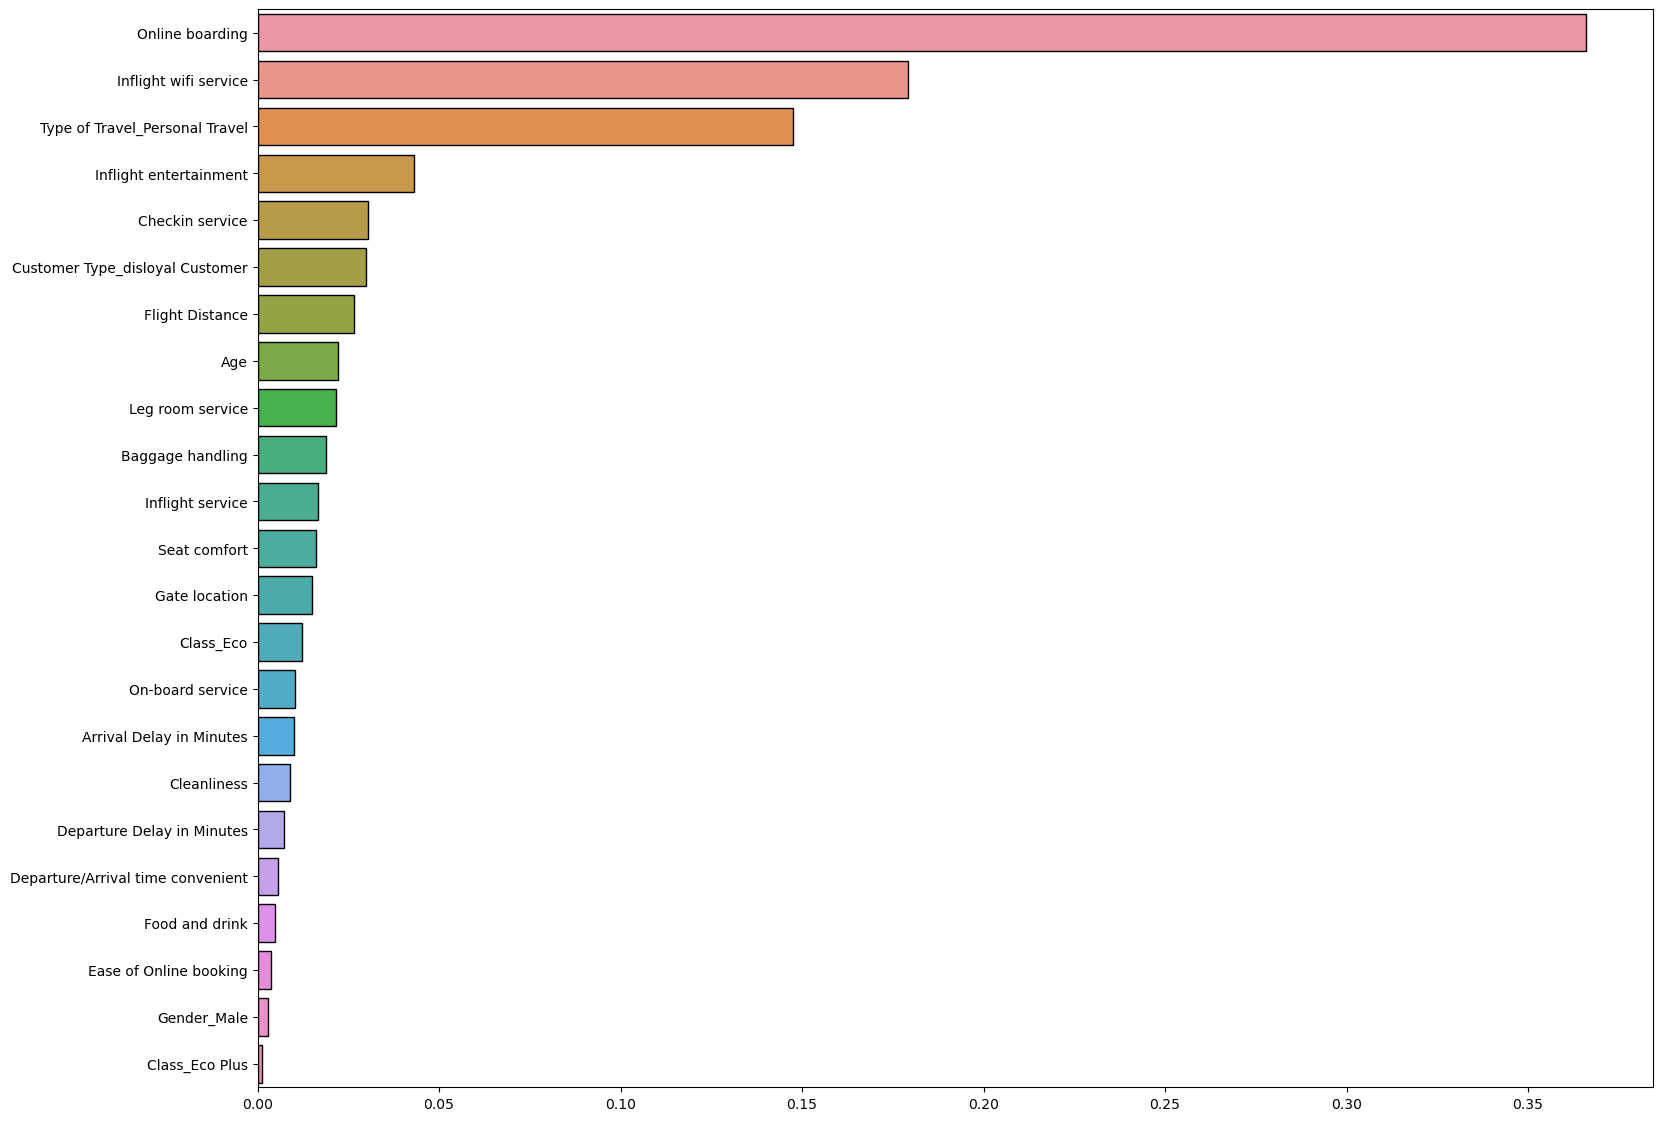

In [303]:
sns.barplot(x = dt['Imp'].values, y = dt.index, edgecolor='black', linewidth=1);

#### NOTE: 
- From above we can say that Decision tree is overgrown which means it is suffering from Overfitting i.e High Variance and Low Bias
- A model with high variance pays lot of attention on available data therefore it performs very well on train data and poorly performs on test data.
- Overfitting happens when model is very close to observed data and capture noise along with underlying patterns

### Regularizing Decision Tree by using Hyperparameters or by applying Tuning parameters

In [306]:
model3_reg = DecisionTreeClassifier(criterion = 'gini', max_depth = 7, min_samples_leaf = 10, min_samples_split = 30,
                                   random_state=1)
model3_reg.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=30,
                       random_state=1)

#### Checking Accuracy for Train and Test set

In [307]:
print('Accuracy score for Train set:', model3_reg.score(x_train, y_train))
print('Accuracy score for Test set:', model3_reg.score(x_test, y_test))

Accuracy score for Train set: 0.927115987460815
Accuracy score for Test set: 0.9238419094058771


In [308]:
df_tree_satisfaction_reg = open('C:\Data Science\Resume_Projects\df_tree_satisfaction_reg.dot', 'w')

In [309]:
dot_data = tree.export_graphviz(model3_reg, out_file = df_tree_satisfaction_reg, feature_names = list(x_train),
                               class_names = list(y_train_label))

In [310]:
df_tree_satisfaction_reg.close()

#### Checking Important features having High Gini Index or Gini Gain

In [313]:
dt_reg = pd.DataFrame(model3_reg.feature_importances_, columns = ['Imp'], 
                      index = x_train.columns).sort_values('Imp',ascending=False)
dt_reg

,Imp
Online boarding,0.458862
Inflight wifi service,0.212555
Type of Travel_Personal Travel,0.165573
Inflight entertainment,0.050109
Customer Type_disloyal Customer,0.031588
Checkin service,0.026050
Leg room service,0.016282
Class_Eco,0.010012
Gate location,0.007856
Seat comfort,0.007096


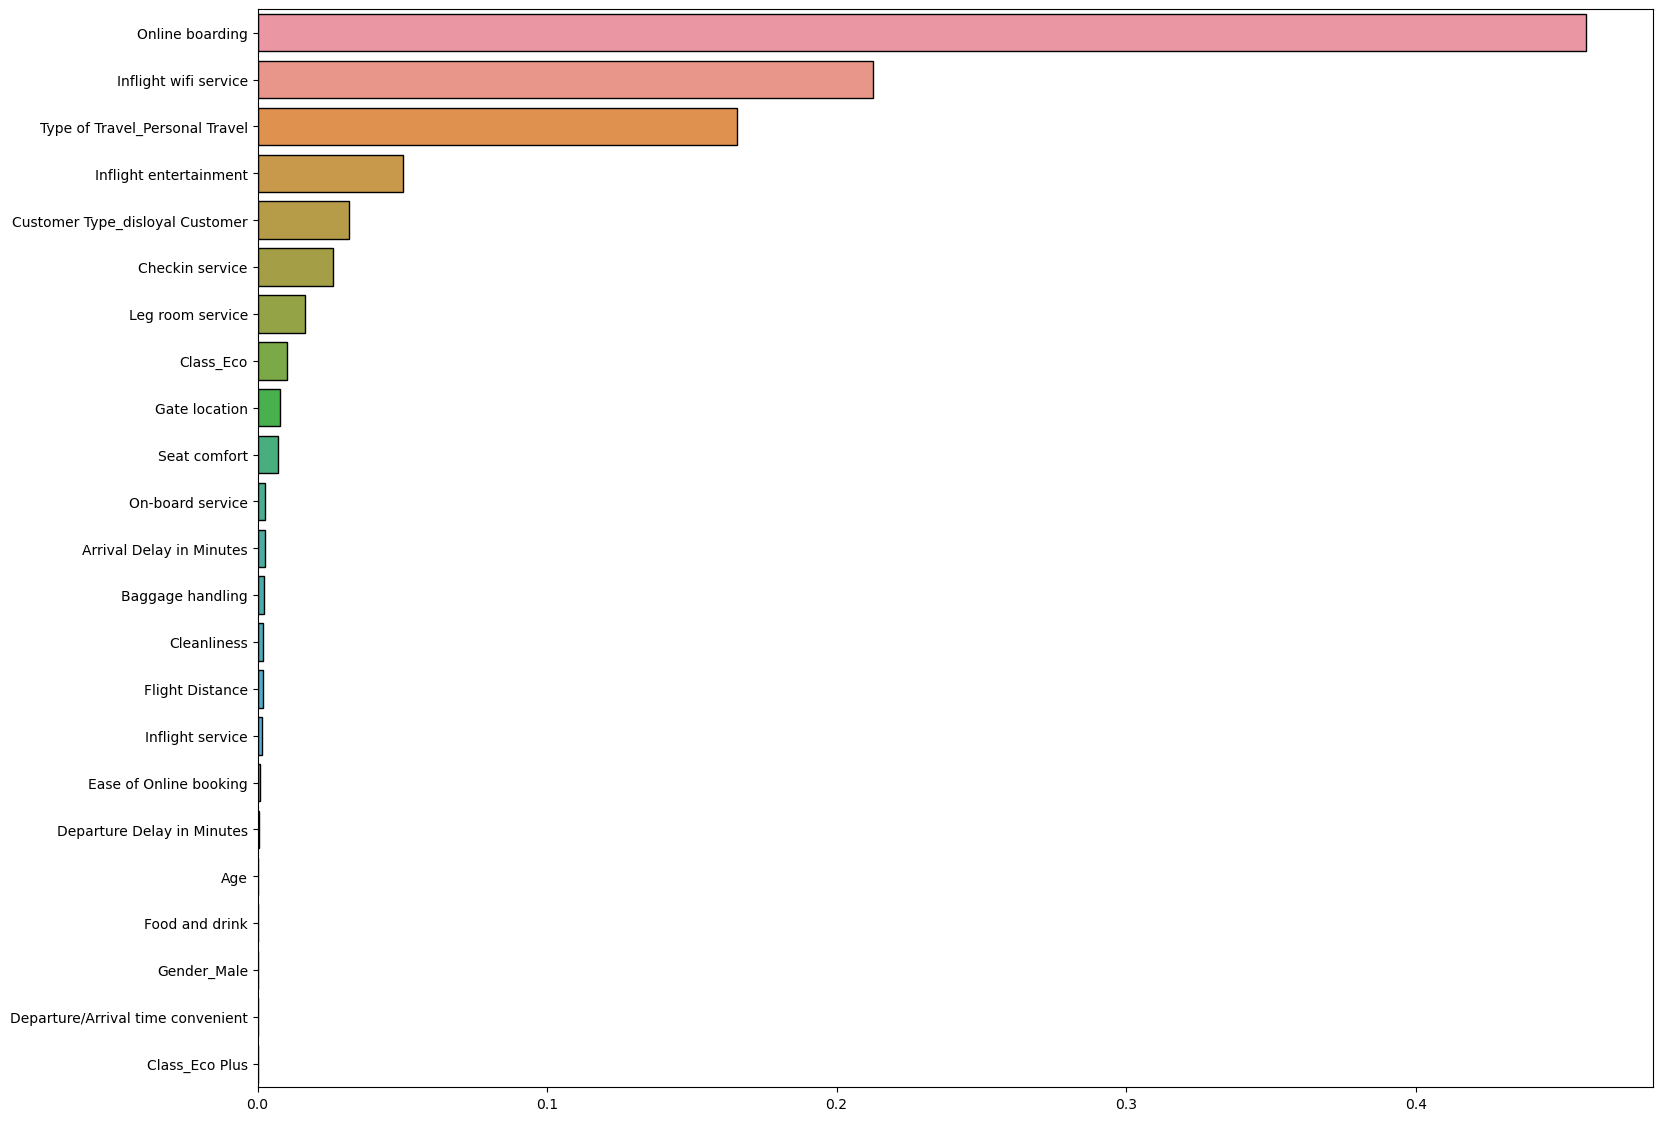

In [315]:
sns.barplot(x = dt_reg['Imp'].values, y = dt_reg.index, edgecolor='black', linewidth=1);

#### Checking Confusion Matrix and Classification report for Train and Test set

In [316]:
print('Confusion matrix for train set:\n', metrics.confusion_matrix(y_train, model3_reg.predict(x_train)),'\n')
print('Confusion matrix for test set:\n', metrics.confusion_matrix(y_test, model3_reg.predict(x_test)))

Confusion matrix for train set:
 [[39113  2074]
 [ 3227 28318]] 

Confusion matrix for test set:
 [[16736   956]
 [ 1418 12062]]


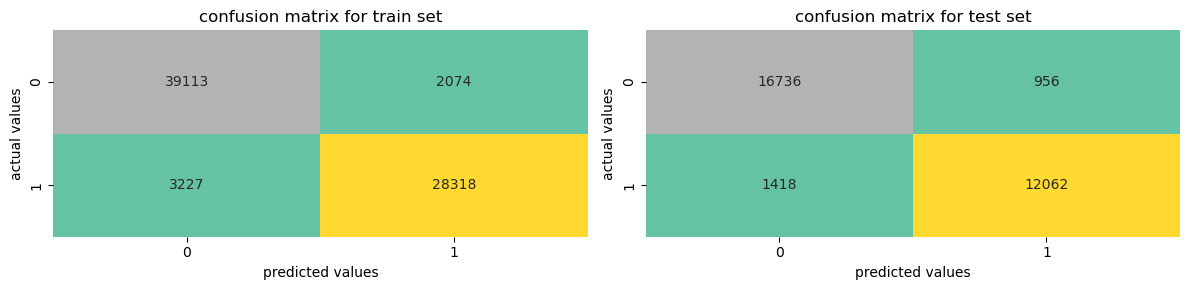

In [317]:
plt.figure(figsize = (12,3))
plt.subplot(1,2,1)
sns.heatmap((metrics.confusion_matrix(y_train, model3_reg.predict(x_train))), annot=True, fmt='.5g', cbar=False, cmap='Set2')
plt.title('confusion matrix for train set')
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.subplot(1,2,2)
sns.heatmap((metrics.confusion_matrix(y_test, model3_reg.predict(x_test))), annot=True, fmt='.5g', cbar=False, cmap='Set2')
plt.title('confusion matrix for test set')
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.tight_layout();

In [318]:
print('Classification report for train set:\n', metrics.classification_report(y_train, model3_reg.predict(x_train),
                                                                             target_names = ['neutral or dissatisfaction',
                                                                                            'satisfaction']),'\n')
print('Classification report for test set:\n', metrics.classification_report(y_test, model3_reg.predict(x_test),
                                                                            target_names = ['neutral or dissatisfaction',
                                                                                           'satisfaction']))

Classification report for train set:
                             precision    recall  f1-score   support

neutral or dissatisfaction       0.92      0.95      0.94     41187
              satisfaction       0.93      0.90      0.91     31545

                  accuracy                           0.93     72732
                 macro avg       0.93      0.92      0.93     72732
              weighted avg       0.93      0.93      0.93     72732
 

Classification report for test set:
                             precision    recall  f1-score   support

neutral or dissatisfaction       0.92      0.95      0.93     17692
              satisfaction       0.93      0.89      0.91     13480

                  accuracy                           0.92     31172
                 macro avg       0.92      0.92      0.92     31172
              weighted avg       0.92      0.92      0.92     31172



AUC score for train set: 0.9805104678900881
AUC score for test set: 0.9780262194148339


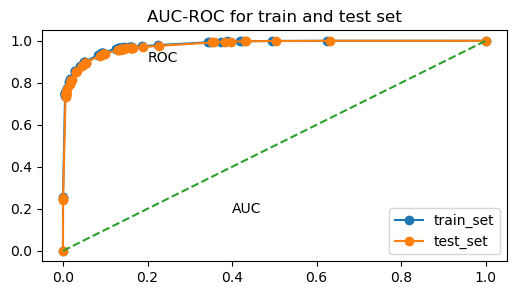

In [319]:
auc_train = roc_auc_score(y_train, model3_reg.predict_proba(x_train)[:,1])
print('AUC score for train set:', auc_train)
auc_test = roc_auc_score(y_test, model3_reg.predict_proba(x_test)[:,1])
print('AUC score for test set:', auc_test)

train_fpr, train_tpr, train_threshold = roc_curve(y_train, model3_reg.predict_proba(x_train)[:,1])
plt.figure(figsize = (6,3))
plt.plot(train_fpr, train_tpr, marker = 'o')

test_fpr, test_tpr, test_threshold = roc_curve(y_test, model3_reg.predict_proba(x_test)[:,1])
plt.plot(test_fpr, test_tpr, marker = 'o')
plt.plot([0,1],[0,1], linestyle = '--')
plt.legend(labels = ['train_set', 'test_set'])
plt.annotate('ROC', (0.2, 0.90))
plt.annotate('AUC', (0.4, 0.18))
plt.title('AUC-ROC for train and test set');

### Bagging Classifier

In [321]:
bag = BaggingClassifier(base_estimator = model3, n_estimators = 50, random_state=1)
bag.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                  n_estimators=50, random_state=1)

#### Checking Accuracy for Train and Test set

In [322]:
print('Accuracy score for Train set:', bag.score(x_train, y_train))
print('Accuracy score for Test set:', bag.score(x_test, y_test))

Accuracy score for Train set: 0.9998212616179948
Accuracy score for Test set: 0.9587771076607211


#### Checking Confusion matrix and Classification report for Train and Test set

In [323]:
print('Confusion matrix for train set:\n', metrics.confusion_matrix(y_train, bag.predict(x_train)),'\n')
print('Confusion matrix for test set:\n', metrics.confusion_matrix(y_test, bag.predict(x_test)))

Confusion matrix for train set:
 [[41187     0]
 [   13 31532]] 

Confusion matrix for test set:
 [[17242   450]
 [  835 12645]]


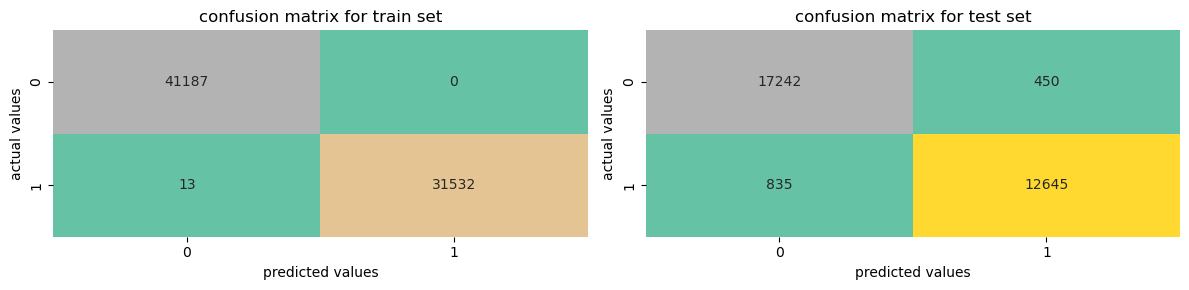

In [324]:
plt.figure(figsize = (12,3))
plt.subplot(1,2,1)
sns.heatmap((metrics.confusion_matrix(y_train, bag.predict(x_train))), annot=True, fmt='.5g', cbar=False, cmap='Set2')
plt.title('confusion matrix for train set')
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.subplot(1,2,2)
sns.heatmap((metrics.confusion_matrix(y_test, bag.predict(x_test))), annot=True, fmt='.5g', cbar=False, cmap='Set2')
plt.title('confusion matrix for test set')
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.tight_layout();

In [325]:
print('Classification report for train set:\n', metrics.classification_report(y_train, bag.predict(x_train),
                                                                             target_names = ['neutral or dissatisfaction',
                                                                                            'satisfaction']),'\n')
print('Classification report for test set:\n', metrics.classification_report(y_test, bag.predict(x_test),
                                                                            target_names = ['neutral or dissatisfaction',
                                                                                           'satisfaction']))

Classification report for train set:
                             precision    recall  f1-score   support

neutral or dissatisfaction       1.00      1.00      1.00     41187
              satisfaction       1.00      1.00      1.00     31545

                  accuracy                           1.00     72732
                 macro avg       1.00      1.00      1.00     72732
              weighted avg       1.00      1.00      1.00     72732
 

Classification report for test set:
                             precision    recall  f1-score   support

neutral or dissatisfaction       0.95      0.97      0.96     17692
              satisfaction       0.97      0.94      0.95     13480

                  accuracy                           0.96     31172
                 macro avg       0.96      0.96      0.96     31172
              weighted avg       0.96      0.96      0.96     31172



AUC score for train set: 0.9999999649796321
AUC score for test set: 0.9923672688824468


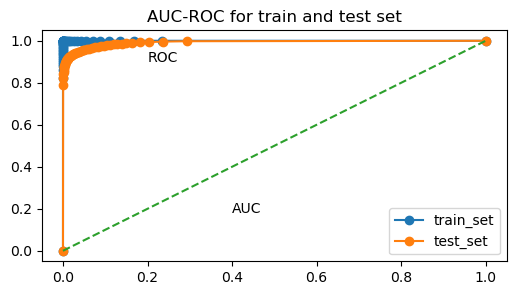

In [326]:
auc_train = roc_auc_score(y_train, bag.predict_proba(x_train)[:,1])
print('AUC score for train set:', auc_train)
auc_test = roc_auc_score(y_test, bag.predict_proba(x_test)[:,1])
print('AUC score for test set:', auc_test)

train_fpr, train_tpr, train_threshold = roc_curve(y_train, bag.predict_proba(x_train)[:,1])
plt.figure(figsize = (6,3))
plt.plot(train_fpr, train_tpr, marker = 'o')

test_fpr, test_tpr, test_threshold = roc_curve(y_test, bag.predict_proba(x_test)[:,1])
plt.plot(test_fpr, test_tpr, marker = 'o')
plt.plot([0,1],[0,1], linestyle = '--')
plt.legend(labels = ['train_set', 'test_set'])
plt.annotate('ROC', (0.2, 0.90))
plt.annotate('AUC', (0.4, 0.18))
plt.title('AUC-ROC for train and test set');

### Adaptive Boosting Classifier

In [347]:
ada = AdaBoostClassifier(base_estimator = model3_reg, n_estimators = 50, random_state=1)
ada.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=7,
                                                         min_samples_leaf=10,
                                                         min_samples_split=30,
                                                         random_state=1),
                   random_state=1)

#### Checking Accuracy for Train and Test set

In [348]:
print('Accuracy score for Train set:', ada.score(x_train, y_train))
print('Accuracy score for Test set:', ada.score(x_test, y_test))

Accuracy score for Train set: 0.9985425947313424
Accuracy score for Test set: 0.9485756448094443


#### Checking Confusion matrix and Classification report for Train and Test set

In [349]:
print('Confusion matrix for train set:\n', metrics.confusion_matrix(y_train, ada.predict(x_train)),'\n')
print('Confusion matrix for test set:\n', metrics.confusion_matrix(y_test, ada.predict(x_test)))

Confusion matrix for train set:
 [[41144    43]
 [   63 31482]] 

Confusion matrix for test set:
 [[16953   739]
 [  864 12616]]


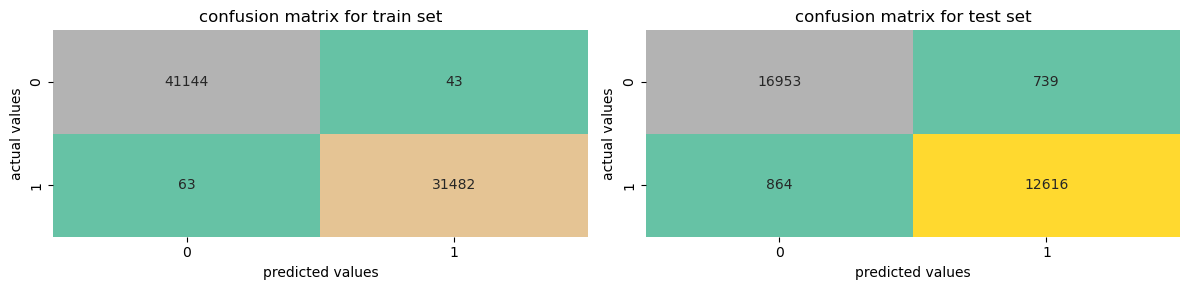

In [350]:
plt.figure(figsize = (12,3))
plt.subplot(1,2,1)
sns.heatmap((metrics.confusion_matrix(y_train, ada.predict(x_train))), annot=True, fmt='.5g', cbar=False, cmap='Set2')
plt.title('confusion matrix for train set')
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.subplot(1,2,2)
sns.heatmap((metrics.confusion_matrix(y_test, ada.predict(x_test))), annot=True, fmt='.5g', cbar=False, cmap='Set2')
plt.title('confusion matrix for test set')
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.tight_layout();

In [351]:
print('Classification report for train set:\n', metrics.classification_report(y_train, ada.predict(x_train),
                                                                             target_names = ['neutral or dissatisfaction',
                                                                                            'satisfaction']),'\n')
print('Classification report for test set:\n', metrics.classification_report(y_test, ada.predict(x_test),
                                                                            target_names = ['neutral or dissatisfaction',
                                                                                           'satisfaction']))

Classification report for train set:
                             precision    recall  f1-score   support

neutral or dissatisfaction       1.00      1.00      1.00     41187
              satisfaction       1.00      1.00      1.00     31545

                  accuracy                           1.00     72732
                 macro avg       1.00      1.00      1.00     72732
              weighted avg       1.00      1.00      1.00     72732
 

Classification report for test set:
                             precision    recall  f1-score   support

neutral or dissatisfaction       0.95      0.96      0.95     17692
              satisfaction       0.94      0.94      0.94     13480

                  accuracy                           0.95     31172
                 macro avg       0.95      0.95      0.95     31172
              weighted avg       0.95      0.95      0.95     31172



AUC score for train set: 0.999993217593788
AUC score for test set: 0.989437408548919


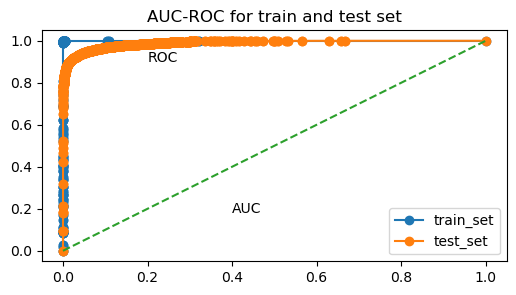

In [352]:
auc_train = roc_auc_score(y_train, ada.predict_proba(x_train)[:,1])
print('AUC score for train set:', auc_train)
auc_test = roc_auc_score(y_test, ada.predict_proba(x_test)[:,1])
print('AUC score for test set:', auc_test)

train_fpr, train_tpr, train_threshold = roc_curve(y_train, ada.predict_proba(x_train)[:,1])
plt.figure(figsize = (6,3))
plt.plot(train_fpr, train_tpr, marker = 'o')

test_fpr, test_tpr, test_threshold = roc_curve(y_test, ada.predict_proba(x_test)[:,1])
plt.plot(test_fpr, test_tpr, marker = 'o')
plt.plot([0,1],[0,1], linestyle = '--')
plt.legend(labels = ['train_set', 'test_set'])
plt.annotate('ROC', (0.2, 0.90))
plt.annotate('AUC', (0.4, 0.18))
plt.title('AUC-ROC for train and test set');

#### Checking Important features having High Coefficient value

In [354]:
ada_imp = pd.DataFrame(ada.feature_importances_, columns = ['Imp'], index = x_train.columns).sort_values('Imp',ascending=False)
ada_imp

,Imp
Flight Distance,0.186330
Age,0.121247
Departure Delay in Minutes,0.048171
Arrival Delay in Minutes,0.046573
Checkin service,0.045706
Inflight wifi service,0.042930
Seat comfort,0.042780
On-board service,0.041506
Baggage handling,0.040935
Gate location,0.039651


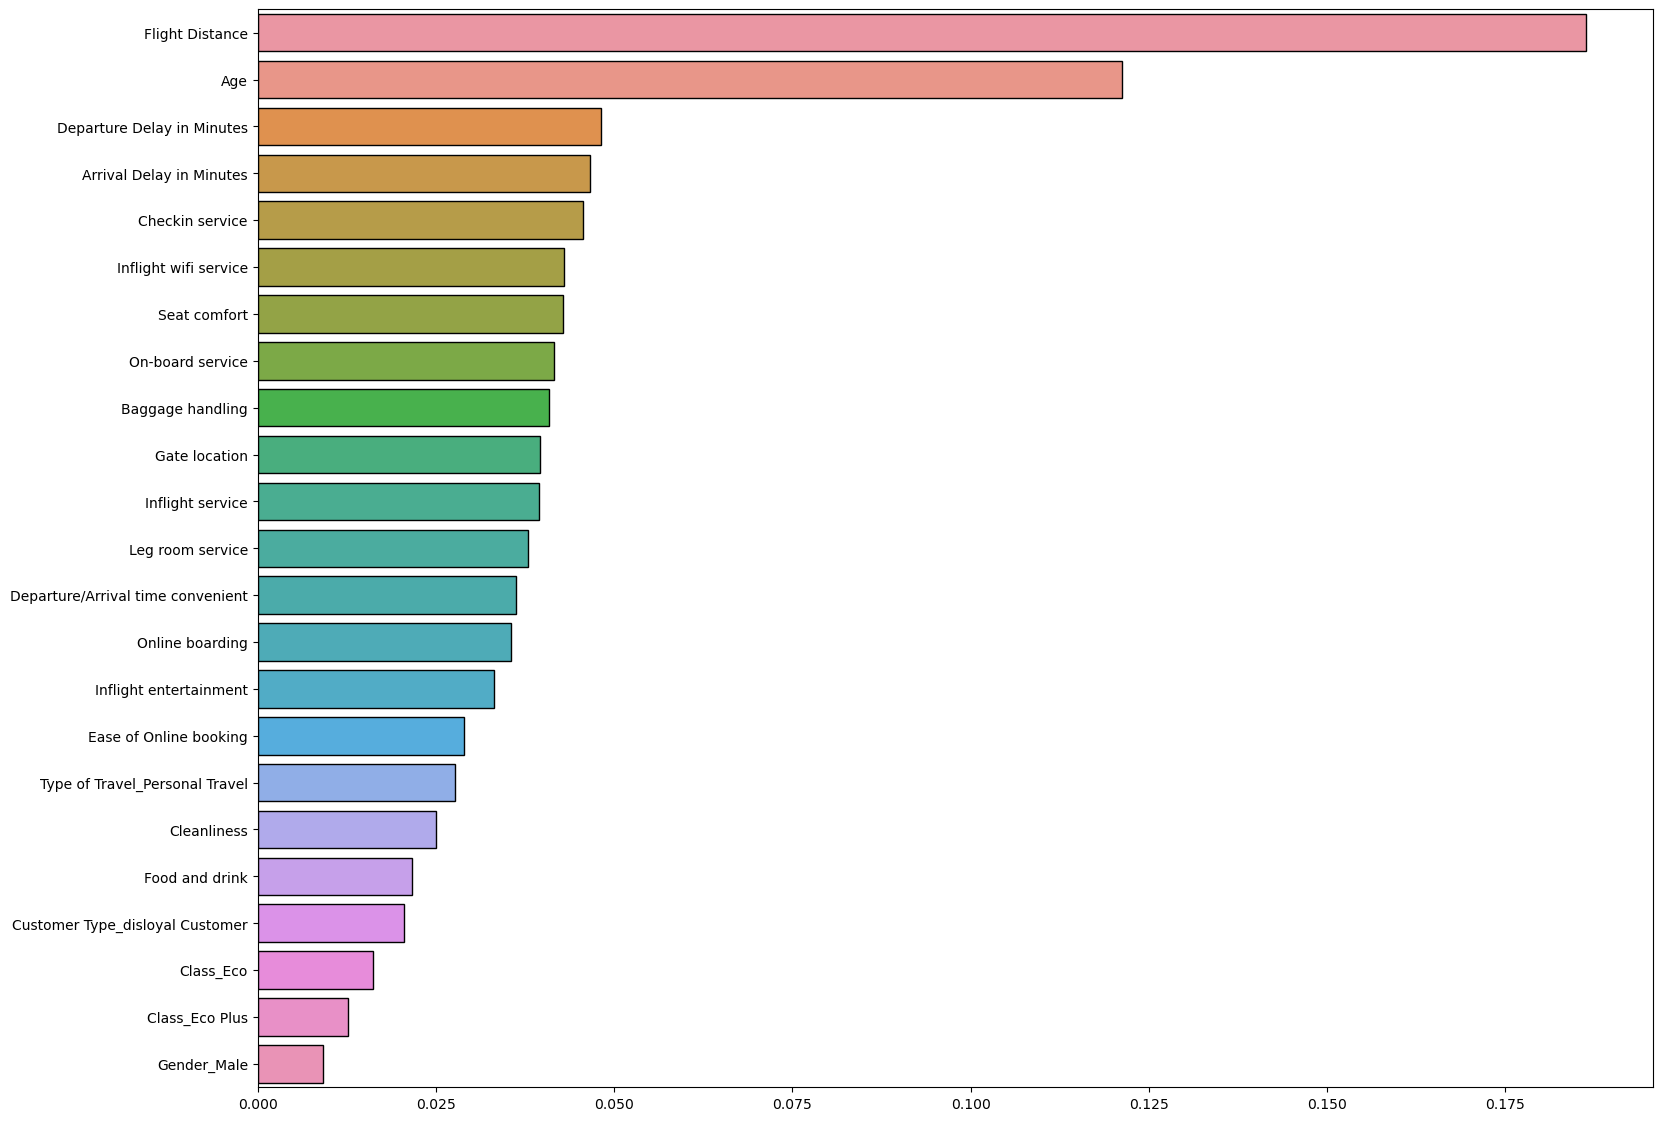

In [356]:
sns.barplot(x = ada_imp['Imp'].values, y = ada_imp.index, edgecolor='black', linewidth=1);

### Gradient Boosting Classifier

In [357]:
gb = GradientBoostingClassifier(n_estimators = 50, random_state=1)
gb.fit(x_train, y_train)

GradientBoostingClassifier(n_estimators=50, random_state=1)

#### Checking Accuracy for Train and Test set

In [358]:
print('Accuracy score for Train set:', gb.score(x_train, y_train))
print('Accuracy score for Test set:', gb.score(x_test, y_test))

Accuracy score for Train set: 0.9326706264092834
Accuracy score for Test set: 0.9313165661491082


#### Checking Confusion matrix and Classification report for Train and Test set

In [359]:
print('Confusion matrix for train set:\n', metrics.confusion_matrix(y_train, gb.predict(x_train)),'\n')
print('Confusion matrix for test set:\n', metrics.confusion_matrix(y_test, gb.predict(x_test)))

Confusion matrix for train set:
 [[39202  1985]
 [ 2912 28633]] 

Confusion matrix for test set:
 [[16819   873]
 [ 1268 12212]]


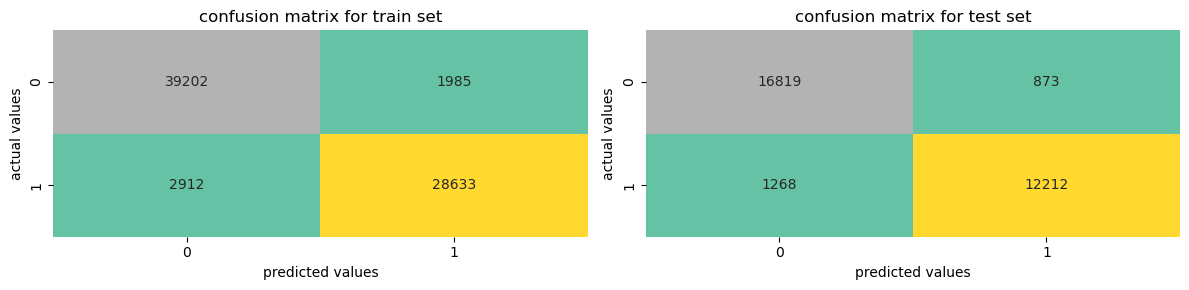

In [360]:
plt.figure(figsize = (12,3))
plt.subplot(1,2,1)
sns.heatmap((metrics.confusion_matrix(y_train, gb.predict(x_train))), annot=True, fmt='.5g', cbar=False, cmap='Set2')
plt.title('confusion matrix for train set')
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.subplot(1,2,2)
sns.heatmap((metrics.confusion_matrix(y_test, gb.predict(x_test))), annot=True, fmt='.5g', cbar=False, cmap='Set2')
plt.title('confusion matrix for test set')
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.tight_layout();

In [361]:
print('Classification report for train set:\n', metrics.classification_report(y_train, gb.predict(x_train),
                                                                             target_names = ['neutral or dissatisfaction',
                                                                                            'satisfaction']),'\n')
print('Classification report for test set:\n', metrics.classification_report(y_test, gb.predict(x_test),
                                                                            target_names = ['neutral or dissatisfaction',
                                                                                           'satisfaction']))

Classification report for train set:
                             precision    recall  f1-score   support

neutral or dissatisfaction       0.93      0.95      0.94     41187
              satisfaction       0.94      0.91      0.92     31545

                  accuracy                           0.93     72732
                 macro avg       0.93      0.93      0.93     72732
              weighted avg       0.93      0.93      0.93     72732
 

Classification report for test set:
                             precision    recall  f1-score   support

neutral or dissatisfaction       0.93      0.95      0.94     17692
              satisfaction       0.93      0.91      0.92     13480

                  accuracy                           0.93     31172
                 macro avg       0.93      0.93      0.93     31172
              weighted avg       0.93      0.93      0.93     31172



AUC score for train set: 0.9833501171333174
AUC score for test set: 0.9827317402255944


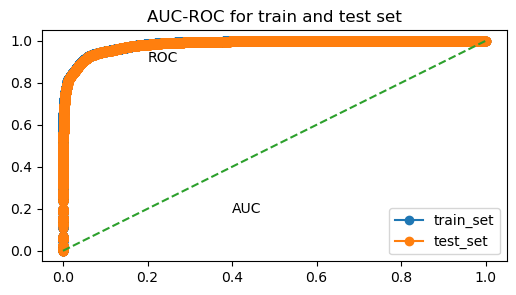

In [362]:
auc_train = roc_auc_score(y_train, gb.predict_proba(x_train)[:,1])
print('AUC score for train set:', auc_train)
auc_test = roc_auc_score(y_test, gb.predict_proba(x_test)[:,1])
print('AUC score for test set:', auc_test)

train_fpr, train_tpr, train_threshold = roc_curve(y_train, gb.predict_proba(x_train)[:,1])
plt.figure(figsize = (6,3))
plt.plot(train_fpr, train_tpr, marker = 'o')

test_fpr, test_tpr, test_threshold = roc_curve(y_test, gb.predict_proba(x_test)[:,1])
plt.plot(test_fpr, test_tpr, marker = 'o')
plt.plot([0,1],[0,1], linestyle = '--')
plt.legend(labels = ['train_set', 'test_set'])
plt.annotate('ROC', (0.2, 0.90))
plt.annotate('AUC', (0.4, 0.18))
plt.title('AUC-ROC for train and test set');

#### Checking Important features

In [365]:
gb_imp = pd.DataFrame(gb.feature_importances_, columns = ['Imp'], index = x_train.columns).sort_values('Imp',ascending=False)
gb_imp

,Imp
Online boarding,0.417908
Inflight wifi service,0.227227
Type of Travel_Personal Travel,0.175544
Class_Eco,0.046170
Inflight entertainment,0.037885
Customer Type_disloyal Customer,0.025007
Leg room service,0.019404
Checkin service,0.017690
On-board service,0.010501
Baggage handling,0.005726


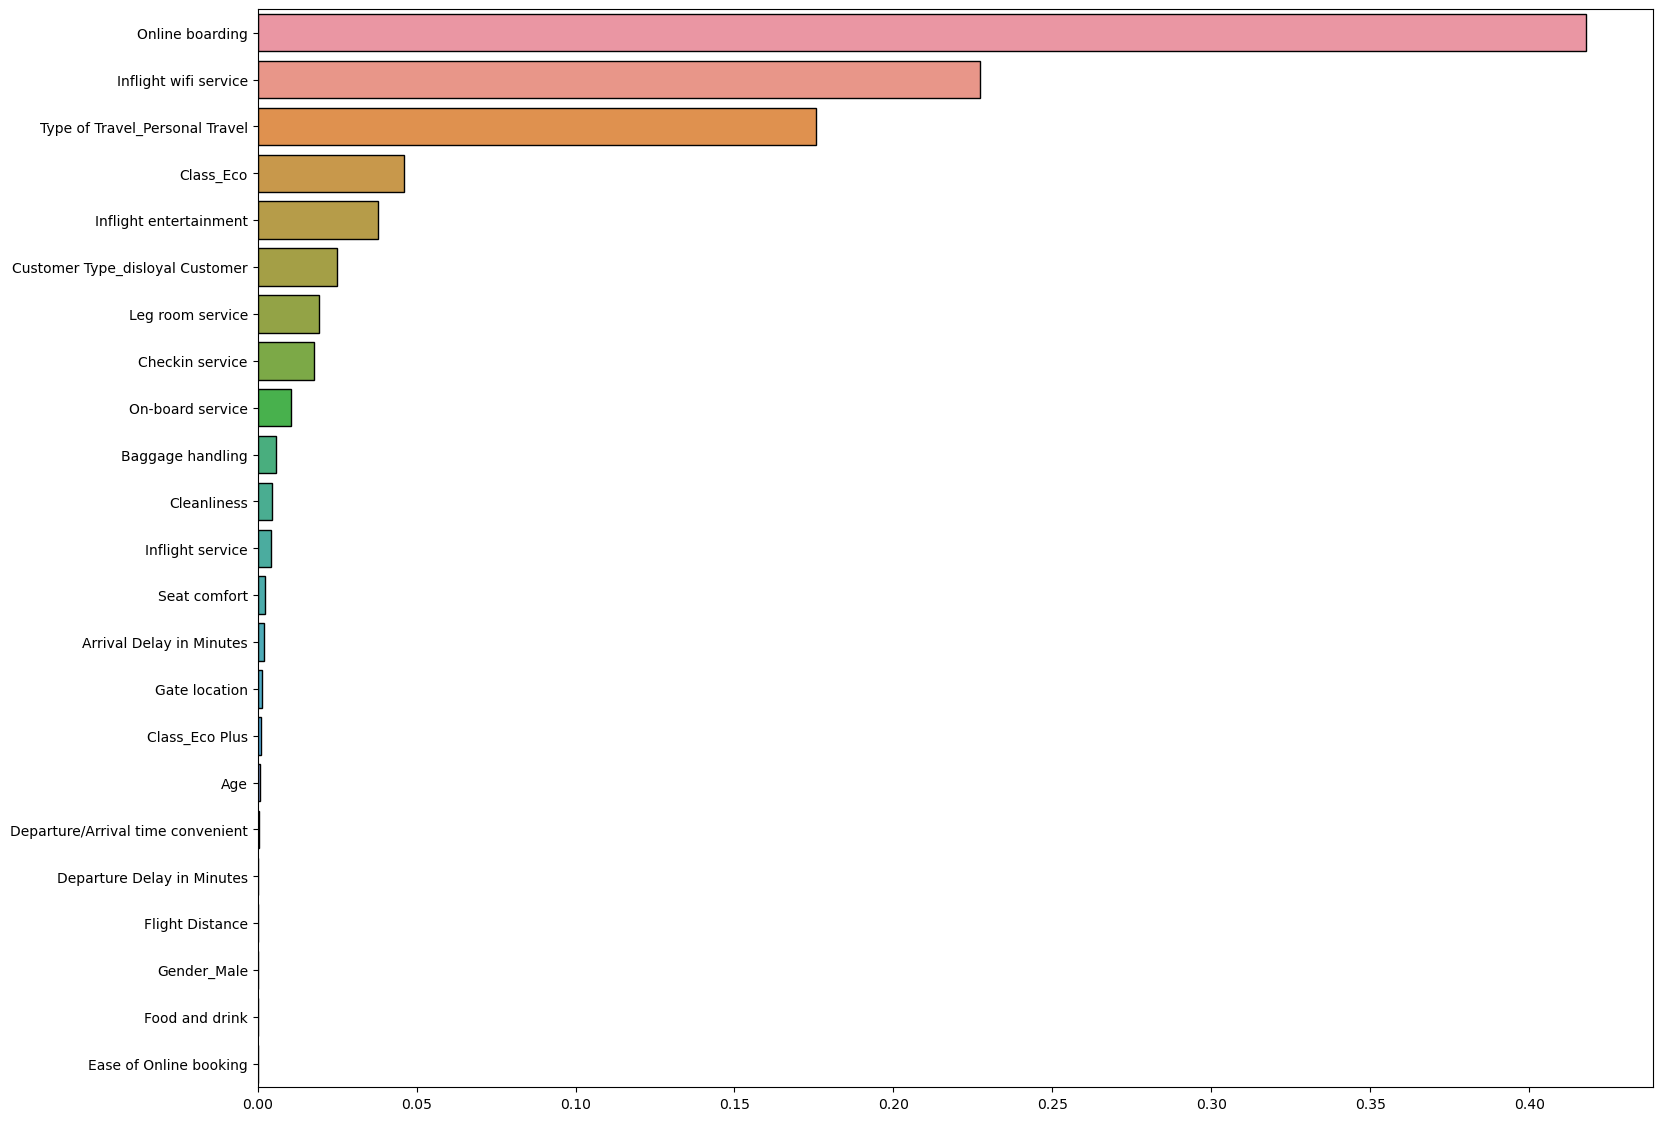

In [366]:
sns.barplot(x = gb_imp['Imp'].values, y = gb_imp.index, edgecolor='black', linewidth=1);

### Random Forest

In [367]:
rf = RandomForestClassifier(n_estimators = 50, random_state=1)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=1)

#### Checking Accuracy for Train and Test set

In [368]:
print('Accuracy score for Train set:', rf.score(x_train, y_train))
print('Accuracy score for Test set:', rf.score(x_test, y_test))

Accuracy score for Train set: 0.9999175053621515
Accuracy score for Test set: 0.9602527909662517


#### Checking Confusion matrix and Classification report for Train and Test set

In [369]:
print('Confusion matrix for train set:\n', metrics.confusion_matrix(y_train, rf.predict(x_train)),'\n')
print('Confusion matrix for test set:\n', metrics.confusion_matrix(y_test, rf.predict(x_test)))

Confusion matrix for train set:
 [[41187     0]
 [    6 31539]] 

Confusion matrix for test set:
 [[17277   415]
 [  824 12656]]


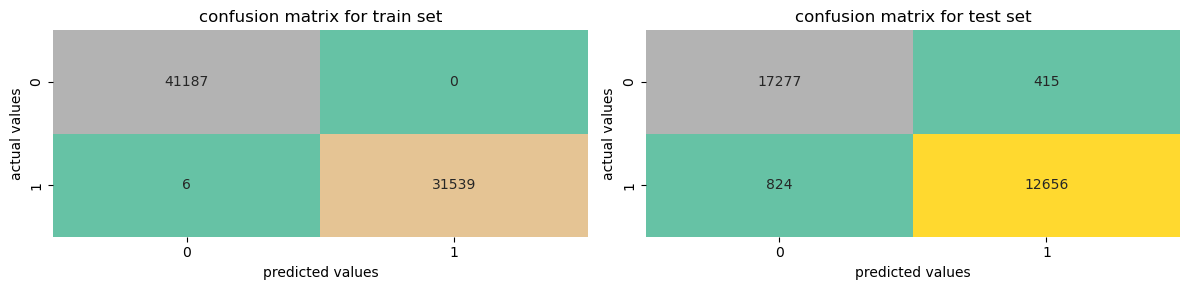

In [370]:
plt.figure(figsize = (12,3))
plt.subplot(1,2,1)
sns.heatmap((metrics.confusion_matrix(y_train, rf.predict(x_train))), annot=True, fmt='.5g', cbar=False, cmap='Set2')
plt.title('confusion matrix for train set')
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.subplot(1,2,2)
sns.heatmap((metrics.confusion_matrix(y_test, rf.predict(x_test))), annot=True, fmt='.5g', cbar=False, cmap='Set2')
plt.title('confusion matrix for test set')
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.tight_layout();

In [371]:
print('Classification report for train set:\n', metrics.classification_report(y_train, rf.predict(x_train),
                                                                             target_names = ['neutral or dissatisfaction',
                                                                                            'satisfaction']),'\n')
print('Classification report for test set:\n', metrics.classification_report(y_test, rf.predict(x_test),
                                                                            target_names = ['neutral or dissatisfaction',
                                                                                           'satisfaction']))

Classification report for train set:
                             precision    recall  f1-score   support

neutral or dissatisfaction       1.00      1.00      1.00     41187
              satisfaction       1.00      1.00      1.00     31545

                  accuracy                           1.00     72732
                 macro avg       1.00      1.00      1.00     72732
              weighted avg       1.00      1.00      1.00     72732
 

Classification report for test set:
                             precision    recall  f1-score   support

neutral or dissatisfaction       0.95      0.98      0.97     17692
              satisfaction       0.97      0.94      0.95     13480

                  accuracy                           0.96     31172
                 macro avg       0.96      0.96      0.96     31172
              weighted avg       0.96      0.96      0.96     31172



AUC score for train set: 0.9999999896093413
AUC score for test set: 0.992671221078648


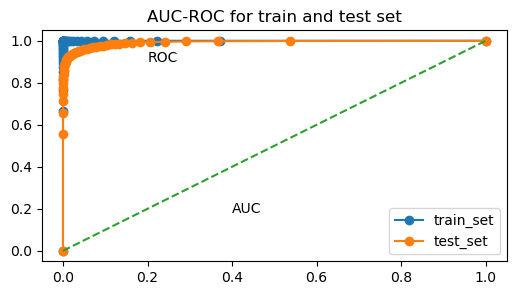

In [372]:
auc_train = roc_auc_score(y_train, rf.predict_proba(x_train)[:,1])
print('AUC score for train set:', auc_train)
auc_test = roc_auc_score(y_test, rf.predict_proba(x_test)[:,1])
print('AUC score for test set:', auc_test)

train_fpr, train_tpr, train_threshold = roc_curve(y_train, rf.predict_proba(x_train)[:,1])
plt.figure(figsize = (6,3))
plt.plot(train_fpr, train_tpr, marker = 'o')

test_fpr, test_tpr, test_threshold = roc_curve(y_test, rf.predict_proba(x_test)[:,1])
plt.plot(test_fpr, test_tpr, marker = 'o')
plt.plot([0,1],[0,1], linestyle = '--')
plt.legend(labels = ['train_set', 'test_set'])
plt.annotate('ROC', (0.2, 0.90))
plt.annotate('AUC', (0.4, 0.18))
plt.title('AUC-ROC for train and test set');

#### Checking Important features

In [374]:
rf_imp =  pd.DataFrame(rf.feature_importances_, columns = ['Imp'], index = x_train.columns).sort_values('Imp',ascending=False)
rf_imp

,Imp
Online boarding,0.166205
Inflight wifi service,0.144831
Type of Travel_Personal Travel,0.111724
Class_Eco,0.078175
Inflight entertainment,0.048459
Seat comfort,0.045755
Flight Distance,0.040533
Leg room service,0.040356
Customer Type_disloyal Customer,0.038379
Ease of Online booking,0.038340


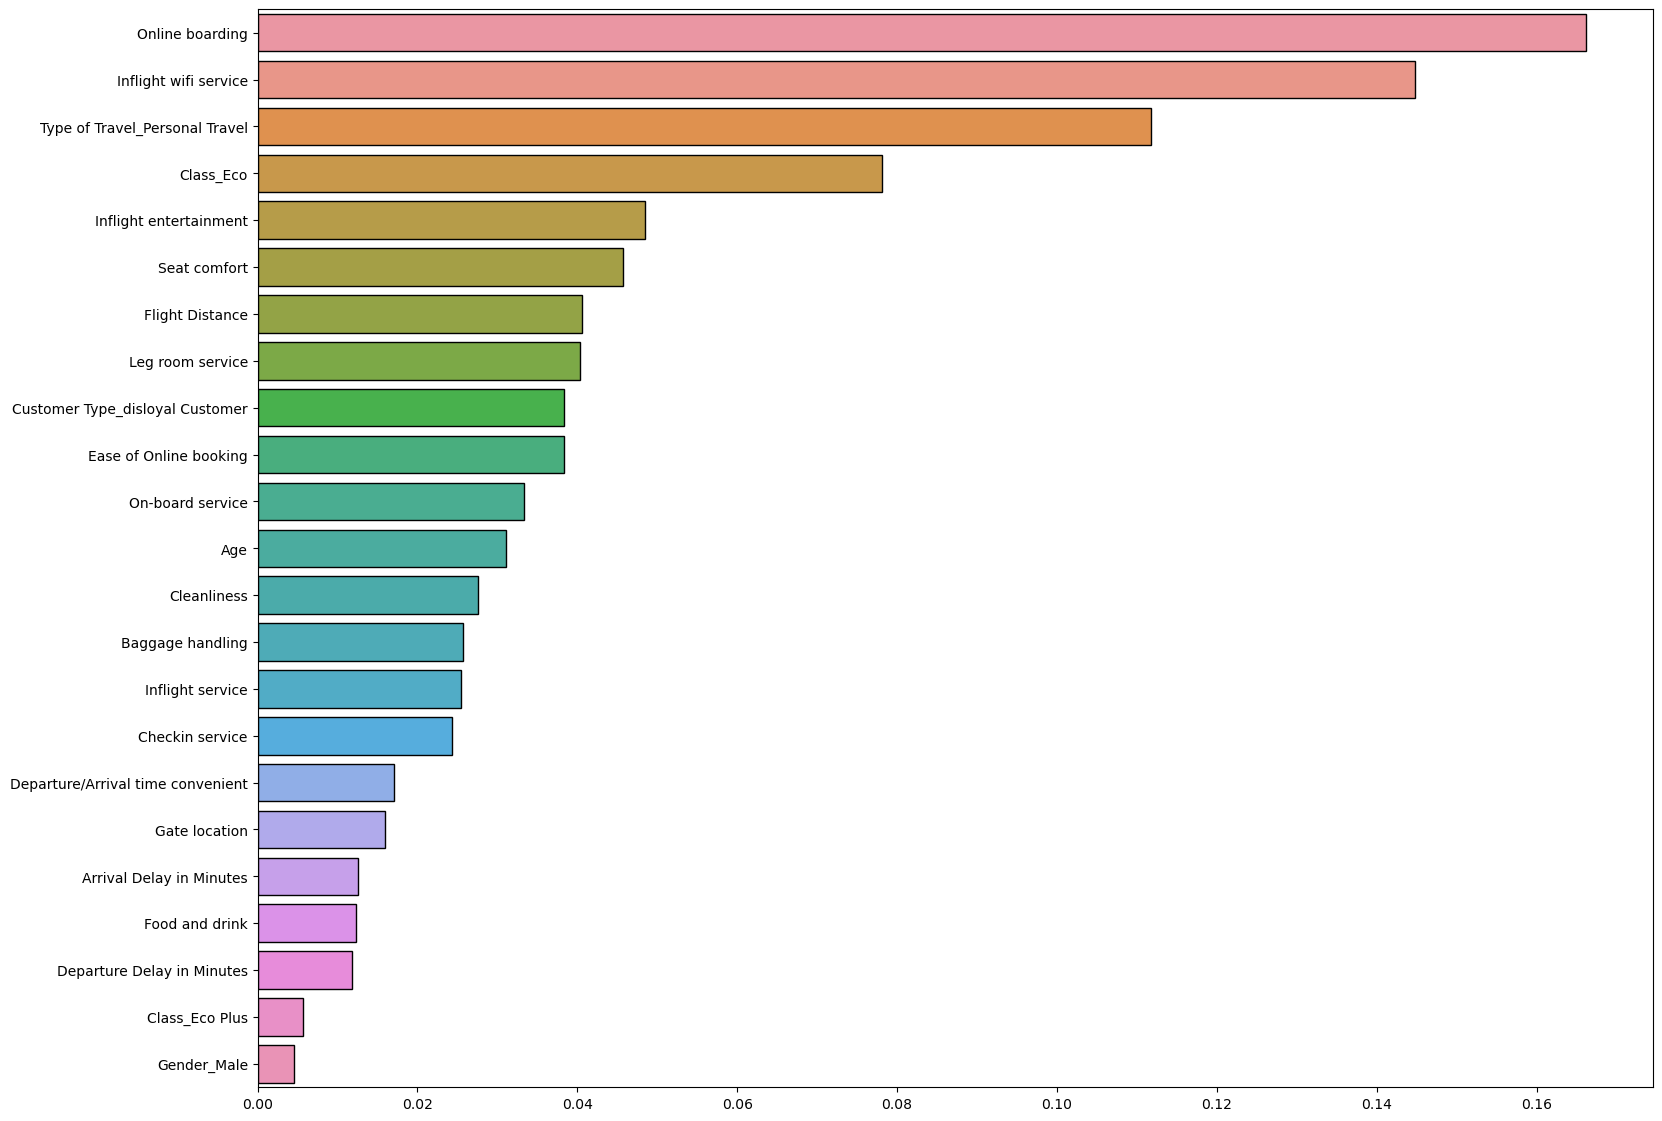

In [375]:
sns.barplot(x = rf_imp['Imp'].values, y = rf_imp.index, edgecolor='black', linewidth=1);

### Naive Bayes Classification

In [376]:
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

#### Checking Accuracy for Train and Test set

In [377]:
print('Accuracy score for Train set:', nb.score(x_train, y_train))
print('Accuracy score for Test set:', nb.score(x_test, y_test))

Accuracy score for Train set: 0.8605840620359677
Accuracy score for Test set: 0.8616386500705762


#### Checking Confusion matrix and Classification report for Train and Test set

In [378]:
print('Confusion matrix for train set:\n', metrics.confusion_matrix(y_train, nb.predict(x_train)),'\n')
print('Confusion matrix for test set:\n', metrics.confusion_matrix(y_test, nb.predict(x_test)))

Confusion matrix for train set:
 [[36973  4214]
 [ 5926 25619]] 

Confusion matrix for test set:
 [[15890  1802]
 [ 2511 10969]]


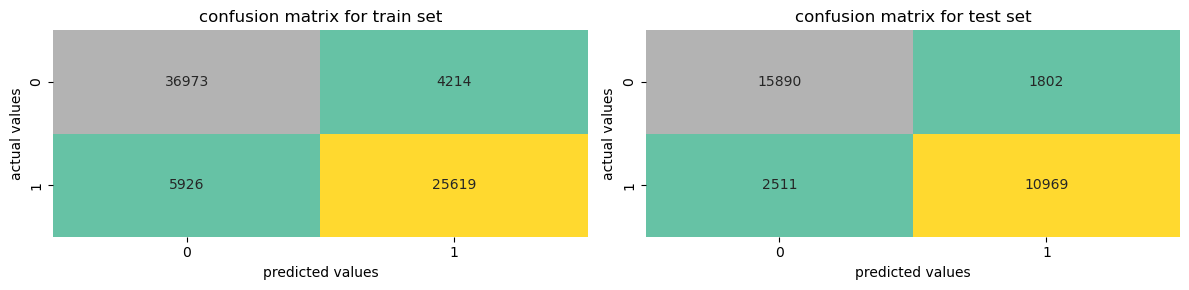

In [379]:
plt.figure(figsize = (12,3))
plt.subplot(1,2,1)
sns.heatmap((metrics.confusion_matrix(y_train, nb.predict(x_train))), annot=True, fmt='.5g', cbar=False, cmap='Set2')
plt.title('confusion matrix for train set')
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.subplot(1,2,2)
sns.heatmap((metrics.confusion_matrix(y_test, nb.predict(x_test))), annot=True, fmt='.5g', cbar=False, cmap='Set2')
plt.title('confusion matrix for test set')
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.tight_layout();

In [380]:
print('Classification report for train set:\n', metrics.classification_report(y_train, nb.predict(x_train),
                                                                             target_names = ['neutral or dissatisfaction',
                                                                                            'satisfaction']),'\n')
print('Classification report for test set:\n', metrics.classification_report(y_test, nb.predict(x_test),
                                                                            target_names = ['neutral or dissatisfaction',
                                                                                           'satisfaction']))

Classification report for train set:
                             precision    recall  f1-score   support

neutral or dissatisfaction       0.86      0.90      0.88     41187
              satisfaction       0.86      0.81      0.83     31545

                  accuracy                           0.86     72732
                 macro avg       0.86      0.85      0.86     72732
              weighted avg       0.86      0.86      0.86     72732
 

Classification report for test set:
                             precision    recall  f1-score   support

neutral or dissatisfaction       0.86      0.90      0.88     17692
              satisfaction       0.86      0.81      0.84     13480

                  accuracy                           0.86     31172
                 macro avg       0.86      0.86      0.86     31172
              weighted avg       0.86      0.86      0.86     31172



AUC score for train set: 0.9210417152502115
AUC score for test set: 0.9205990813128836


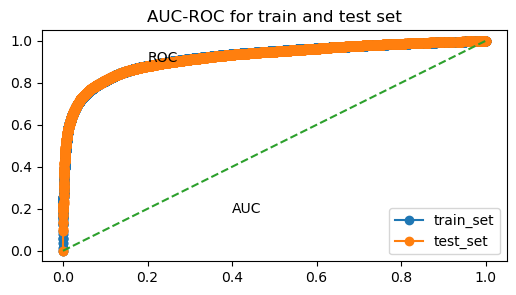

In [381]:
auc_train = roc_auc_score(y_train, nb.predict_proba(x_train)[:,1])
print('AUC score for train set:', auc_train)
auc_test = roc_auc_score(y_test, nb.predict_proba(x_test)[:,1])
print('AUC score for test set:', auc_test)

train_fpr, train_tpr, train_threshold = roc_curve(y_train, nb.predict_proba(x_train)[:,1])
plt.figure(figsize = (6,3))
plt.plot(train_fpr, train_tpr, marker = 'o')

test_fpr, test_tpr, test_threshold = roc_curve(y_test, nb.predict_proba(x_test)[:,1])
plt.plot(test_fpr, test_tpr, marker = 'o')
plt.plot([0,1],[0,1], linestyle = '--')
plt.legend(labels = ['train_set', 'test_set'])
plt.annotate('ROC', (0.2, 0.90))
plt.annotate('AUC', (0.4, 0.18))
plt.title('AUC-ROC for train and test set');

### K Nearest Neighbor (KNN)

In [387]:
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'distance')
knn.fit(x_train, y_train)

KNeighborsClassifier(weights='distance')

#### Checking Accuracy for Train and Test set

In [388]:
print('Accuracy score for Train set:', knn.score(x_train, y_train))
print('Accuracy score for Test set:', knn.score(x_test, y_test))

Accuracy score for Train set: 1.0
Accuracy score for Test set: 0.7417875016040036


#### Performing scaling using MinMaxScaler because KNN is a distance based technique

In [389]:
x_scale = x.copy()

In [390]:
x_scale = x_scale.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [392]:
x_scale.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,0.076923,0.086632,0.6,0.8,0.6,0.2,1.0,0.6,1.0,1.0,0.8,0.6,0.75,0.8,1.0,1.0,0.015704,0.011364,1.0,0.0,1.0,0.0,1.0
1,0.230769,0.041195,0.6,0.4,0.6,0.6,0.2,0.6,0.2,0.2,0.2,1.0,0.50,0.2,0.8,0.2,0.000628,0.003788,1.0,1.0,0.0,0.0,0.0
2,0.243590,0.224354,0.4,0.4,0.4,0.4,1.0,1.0,1.0,1.0,0.8,0.6,0.75,0.8,0.8,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.230769,0.107229,0.4,1.0,1.0,1.0,0.4,0.4,0.4,0.4,0.4,1.0,0.50,0.2,0.8,0.4,0.006910,0.005682,0.0,0.0,0.0,0.0,0.0
4,0.692308,0.036955,0.6,0.6,0.6,0.6,0.8,1.0,1.0,0.6,0.6,0.8,0.75,0.6,0.6,0.6,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0


In [393]:
x_train1, x_test1, y_train, y_test = train_test_split(x_scale, y, test_size = 0.30, random_state=1)

In [394]:
KNN = KNeighborsClassifier(n_neighbors=5, weights='distance')
KNN.fit(x_train1, y_train)

KNeighborsClassifier(weights='distance')

#### Checking Accuracy for Train and Tests set

In [395]:
print('Accuracy score for Train set:', KNN.score(x_train, y_train))
print('Accuracy score for Test set:', KNN.score(x_test, y_test))

Accuracy score for Train set: 0.4381977671451356
Accuracy score for Test set: 0.4371230591556525


#### Checking Confusion matrix and Classification for Train and Test set

In [396]:
print('Confusion matrix for train set:\n', metrics.confusion_matrix(y_train, KNN.predict(x_train)),'\n')
print('Confusion matrix for test set:\n', metrics.confusion_matrix(y_test, KNN.predict(x_test)))

Confusion matrix for train set:
 [[  469 40718]
 [  143 31402]] 

Confusion matrix for test set:
 [[  207 17485]
 [   61 13419]]


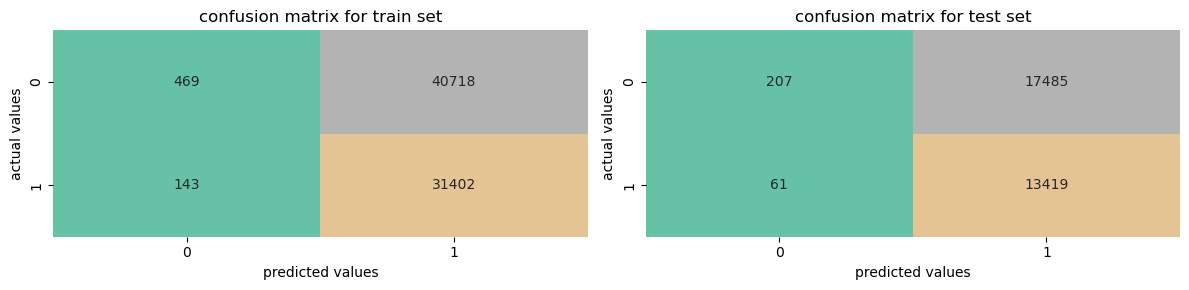

In [397]:
plt.figure(figsize = (12,3))
plt.subplot(1,2,1)
sns.heatmap((metrics.confusion_matrix(y_train, KNN.predict(x_train))), annot=True, fmt='.5g', cbar=False, cmap='Set2')
plt.title('confusion matrix for train set')
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.subplot(1,2,2)
sns.heatmap((metrics.confusion_matrix(y_test, KNN.predict(x_test))), annot=True, fmt='.5g', cbar=False, cmap='Set2')
plt.title('confusion matrix for test set')
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.tight_layout();

In [398]:
print('Classification report for train set:\n', metrics.classification_report(y_train, KNN.predict(x_train),
                                                                             target_names = ['neutral or dissatisfaction',
                                                                                            'satisfaction']),'\n')
print('Classification report for test set:\n', metrics.classification_report(y_test, KNN.predict(x_test),
                                                                            target_names = ['neutral or dissatisfaction',
                                                                                           'satisfaction']))

Classification report for train set:
                             precision    recall  f1-score   support

neutral or dissatisfaction       0.77      0.01      0.02     41187
              satisfaction       0.44      1.00      0.61     31545

                  accuracy                           0.44     72732
                 macro avg       0.60      0.50      0.31     72732
              weighted avg       0.62      0.44      0.28     72732
 

Classification report for test set:
                             precision    recall  f1-score   support

neutral or dissatisfaction       0.77      0.01      0.02     17692
              satisfaction       0.43      1.00      0.60     13480

                  accuracy                           0.44     31172
                 macro avg       0.60      0.50      0.31     31172
              weighted avg       0.63      0.44      0.27     31172



AUC score for train set: 0.5036406270180607
AUC score for test set: 0.5028884201211499


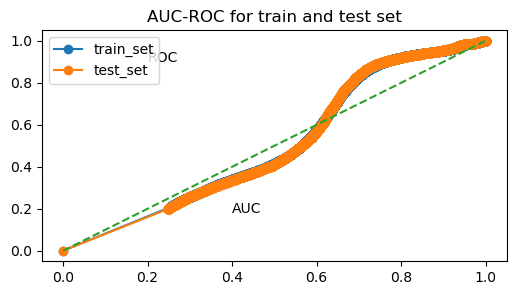

In [399]:
auc_train = roc_auc_score(y_train, KNN.predict_proba(x_train)[:,1])
print('AUC score for train set:', auc_train)
auc_test = roc_auc_score(y_test, KNN.predict_proba(x_test)[:,1])
print('AUC score for test set:', auc_test)

train_fpr, train_tpr, train_threshold = roc_curve(y_train, KNN.predict_proba(x_train)[:,1])
plt.figure(figsize = (6,3))
plt.plot(train_fpr, train_tpr, marker = 'o')

test_fpr, test_tpr, test_threshold = roc_curve(y_test, KNN.predict_proba(x_test)[:,1])
plt.plot(test_fpr, test_tpr, marker = 'o')
plt.plot([0,1],[0,1], linestyle = '--')
plt.legend(labels = ['train_set', 'test_set'])
plt.annotate('ROC', (0.2, 0.90))
plt.annotate('AUC', (0.4, 0.18))
plt.title('AUC-ROC for train and test set');

##### Checking MCE for K = 1,3,5,7-------20 and the least value of MCE is used for building KNN model
- MCE = 1 - Test accuracy score and find the lowest value of MCE to build the model

In [402]:
acc_score = []

for i in range(1,20,2):
    k = KNeighborsClassifier(n_neighbors=i)
    k.fit(x_train, y_train)
    score = k.score(x_test, y_test)
    acc_score.append(score)

In [403]:
MCE = [1 - x for x in acc_score]
MCE

[0.28499935839856283,
 0.26241498780957273,
 0.2591107404080585,
 0.2590145001924804,
 0.2586616194020275,
 0.25875785961760556,
 0.25920698062363656,
 0.2625433080970101,
 0.2641793917618376,
 0.2636340305402284]

#### Plotting screeplot or elbow method

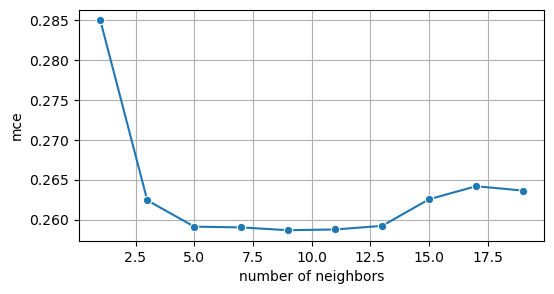

In [407]:
plt.figure(figsize = (6,3))
sns.lineplot(x = range(1,20,2), y = MCE, marker = 'o')
plt.xlabel('number of neighbors')
plt.ylabel('mce')
plt.grid();

### Using SMOTE on KNN model

In [420]:
smote = SMOTE(random_state=1)
x_train_res, y_train_res = smote.fit_resample(x_train1, y_train)

In [421]:
x_train_res.shape

(82374, 23)

In [422]:
knn_smote = KNeighborsClassifier(n_neighbors=5, metric = 'euclidean')
knn_smote.fit(x_train_res, y_train_res)

KNeighborsClassifier(metric='euclidean')

#### Checking Accuracy for Train and Test set

In [424]:
print('Accuracy score for Train set:', knn_smote.score(x_train_res, y_train_res))

Accuracy score for Train set: 0.9562604705368198


#### Checking Confusion matrix and Classification report for Train and Test set

In [427]:
print('Confusion matrix for train set:\n', metrics.confusion_matrix(y_train_res, knn_smote.predict(x_train_res)),'\n')
print('Confusion matrix for test set:\n', metrics.confusion_matrix(y_test, knn_smote.predict(x_test)))

Confusion matrix for train set:
 [[39737  1450]
 [ 2153 39034]] 

Confusion matrix for test set:
 [[  171 17521]
 [   56 13424]]


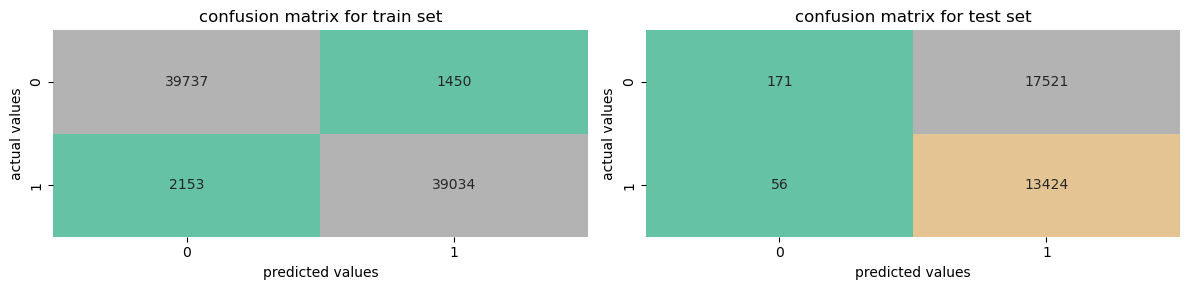

In [428]:
plt.figure(figsize = (12,3))
plt.subplot(1,2,1)
sns.heatmap((metrics.confusion_matrix(y_train_res, knn_smote.predict(x_train_res))), annot=True, fmt='.5g', cbar=False, cmap='Set2')
plt.title('confusion matrix for train set')
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.subplot(1,2,2)
sns.heatmap((metrics.confusion_matrix(y_test, knn_smote.predict(x_test))), annot=True, fmt='.5g', cbar=False, cmap='Set2')
plt.title('confusion matrix for test set')
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.tight_layout();

In [429]:
print('Classification report for train set:\n', metrics.classification_report(y_train_res, knn_smote.predict(x_train_res),
                                                                             target_names = ['neutral or dissatisfaction',
                                                                                            'satisfaction']),'\n')
print('Classification report for test set:\n', metrics.classification_report(y_test, knn_smote.predict(x_test),
                                                                            target_names = ['neutral or dissatisfaction',
                                                                                           'satisfaction']))

Classification report for train set:
                             precision    recall  f1-score   support

neutral or dissatisfaction       0.95      0.96      0.96     41187
              satisfaction       0.96      0.95      0.96     41187

                  accuracy                           0.96     82374
                 macro avg       0.96      0.96      0.96     82374
              weighted avg       0.96      0.96      0.96     82374
 

Classification report for test set:
                             precision    recall  f1-score   support

neutral or dissatisfaction       0.75      0.01      0.02     17692
              satisfaction       0.43      1.00      0.60     13480

                  accuracy                           0.44     31172
                 macro avg       0.59      0.50      0.31     31172
              weighted avg       0.62      0.44      0.27     31172



AUC score for train set: 0.9939868411964567
AUC score for test set: 0.49342879537499884


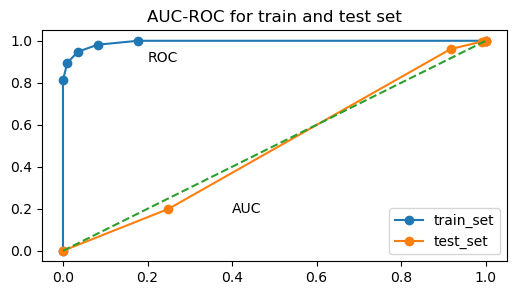

In [430]:
auc_train = roc_auc_score(y_train_res, knn_smote.predict_proba(x_train_res)[:,1])
print('AUC score for train set:', auc_train)
auc_test = roc_auc_score(y_test, knn_smote.predict_proba(x_test)[:,1])
print('AUC score for test set:', auc_test)

train_fpr, train_tpr, train_threshold = roc_curve(y_train_res, knn_smote.predict_proba(x_train_res)[:,1])
plt.figure(figsize = (6,3))
plt.plot(train_fpr, train_tpr, marker = 'o')

test_fpr, test_tpr, test_threshold = roc_curve(y_test, knn_smote.predict_proba(x_test)[:,1])
plt.plot(test_fpr, test_tpr, marker = 'o')
plt.plot([0,1],[0,1], linestyle = '--')
plt.legend(labels = ['train_set', 'test_set'])
plt.annotate('ROC', (0.2, 0.90))
plt.annotate('AUC', (0.4, 0.18))
plt.title('AUC-ROC for train and test set');

### Performing Cross-Validation score on Naive Bayes Classification

In [431]:
cross_val_train = cross_val_score(nb, x_train, y_train, cv=5)
cross_val_train

array([0.85893999, 0.85873376, 0.86408635, 0.86071772, 0.86051148])

In [432]:
cross_val_test = cross_val_score(nb, x_test, y_test, cv=5)
cross_val_test

array([0.85805934, 0.8606255 , 0.86220725, 0.85980109, 0.85498877])

In [433]:
print('Average on train set:', cross_val_train.mean())
print('Average on test set:', cross_val_test.mean())

Average on train set: 0.8605978595662427
Average on test set: 0.8591363912465952


### Model Comparison

In [434]:
def model_score(model, flag=True):
    score_list = []
    
    train_acc = model.score(x_train, y_train)
    test_acc = model.score(x_test, y_test)
    
    train_recall = metrics.recall_score(y_train, model.predict(x_train))
    test_recall = metrics.recall_score(y_test, model.predict(x_test))
    
    train_precision = metrics.precision_score(y_train, model.predict(x_train))
    test_precision = metrics.precision_score(y_test, model.predict(x_test))
    
    score_list.extend((train_acc, test_acc, train_recall, test_recall, train_precision, test_precision))

    if flag==True:
        print('Accuracy for Train set:', train_acc)
        print('Accuracy for Test set:',  test_acc)
        print('Recall for Train set:', train_recall)
        print('Recall for Test set:', test_recall)
        print('Precision for Train set:', train_precision)
        print('Precision for Test set:', test_precision)
    
        
    return score_list

In [440]:
models = [model1, model2, model3_reg, bag, ada, gb, rf, nb, KNN, knn_smote]

acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

for model in models:
    j = model_score(model, False)
    acc_train.append(np.round(j[0], 2))
    acc_test.append(np.round(j[1], 2))
    recall_train.append(np.round(j[2], 2))
    recall_test.append(np.round(j[3], 2))
    precision_train.append(np.round(j[4], 2))
    precision_test.append(np.round(j[5], 2))

In [441]:
model_comparison = pd.DataFrame({'Models': ['Logistic Regression', 'LDA', 'Decision Tree Tuned', 
                                            'Bagging Classifier', 'Ada Boosting Classifier', 
                                           'Gradient Boosting Classifier', 'Random Forest Classifier', 
                                           'Naive Bayes Classifier', 'KNN Classifier', 'KNN Classifier_SMOTE'],
                                'Train_Accuracy': acc_train,
                                'Test_Accuracy': acc_test,
                                'Train_Recall': recall_train,
                                'Test_Recall': recall_test,
                                'Train_Precision': precision_train,
                                'Test_Precision': precision_test})

### Comparing all models having Class of Interest is 'Satisfaction' = 1

In [442]:
model_comparison

,Models,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Logistic Regression,0.81,0.81,0.82,0.82,0.76,0.75
1,LDA,0.87,0.87,0.84,0.84,0.86,0.87
2,Decision Tree Tuned,0.93,0.92,0.90,0.89,0.93,0.93
3,Bagging Classifier,1.00,0.96,1.00,0.94,1.00,0.97
4,Ada Boosting Classifier,1.00,0.95,1.00,0.94,1.00,0.94
5,Gradient Boosting Classifier,0.93,0.93,0.91,0.91,0.94,0.93
6,Random Forest Classifier,1.00,0.96,1.00,0.94,1.00,0.97
7,Naive Bayes Classifier,0.86,0.86,0.81,0.81,0.86,0.86
8,KNN Classifier,0.44,0.44,1.00,1.00,0.44,0.43
9,KNN Classifier_SMOTE,0.44,0.44,1.00,1.00,0.44,0.43


### Plotting AUC-ROC Curve for all models : Test set

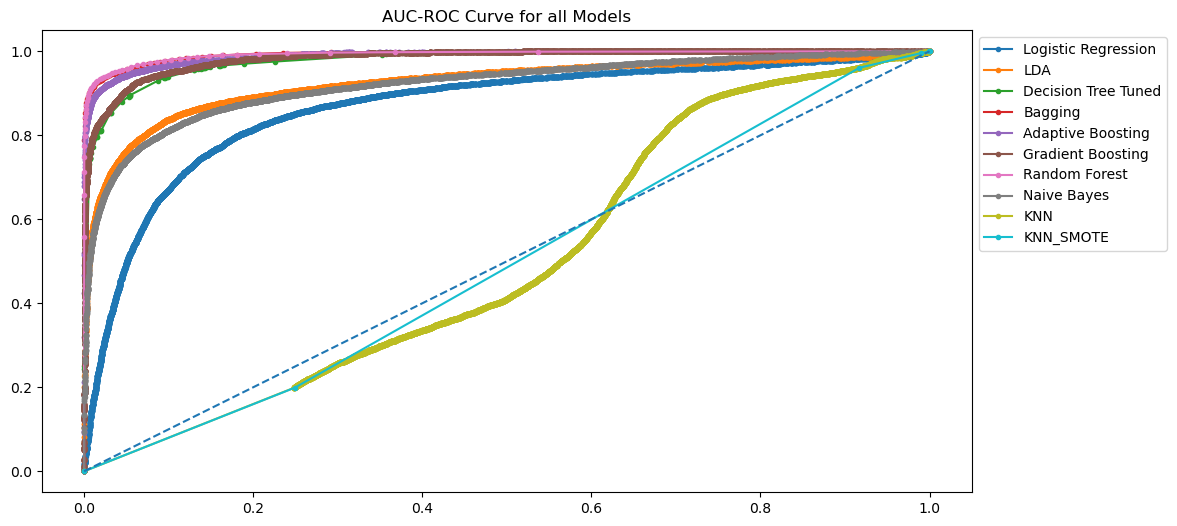

In [447]:
fpr, tpr, threshold = roc_curve(y_test, model1.predict_proba(x_test)[:,1])
plt.figure(figsize = (12,6))
plt.plot(fpr, tpr, marker = '.')

fpr, tpr, threshold = roc_curve(y_test, model2.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr, marker = '.')

fpr, tpr, threshold = roc_curve(y_test, model3_reg.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr, marker = '.')

fpr, tpr, threshold = roc_curve(y_test, bag.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr, marker = '.')

fpr, tpr, threshold = roc_curve(y_test, ada.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr, marker = '.')

fpr, tpr, threshold = roc_curve(y_test, gb.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr, marker = '.')

fpr, tpr, threshold = roc_curve(y_test, rf.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr, marker = '.')

fpr, tpr, threshold = roc_curve(y_test, nb.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr, marker = '.')

fpr, tpr, threshold = roc_curve(y_test, KNN.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr, marker = '.')

fpr, tpr, threshold = roc_curve(y_test, knn_smote.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr, marker = '.')
plt.plot([0,1],[0,1], linestyle = '--')
plt.legend(labels = ['Logistic Regression', 'LDA', 'Decision Tree Tuned', 'Bagging', 'Adaptive Boosting', 'Gradient Boosting',
                    'Random Forest', 'Naive Bayes', 'KNN', 'KNN_SMOTE'], bbox_to_anchor=[1,1])
plt.title('AUC-ROC Curve for all Models');